In [1]:
import ROOT
import pandas as pd
import Functions
import numpy as np
import array
import matplotlib.pyplot as plt
from math import e, log, sqrt

Welcome to JupyROOT 6.26/06


In [2]:
Iname_gain = []
for i in range(339,355):
    Iname_gain.append("PICO_I_run0" + str(i) + ".csv")


In [3]:
colonne = ["I3B", "I3T", "I2B","I2T", "I1B", "I1T","ID"]
f1 = ROOT.TF1( "f", "gaus",-60,0)
folder = "arrays/pico_data"

Warning in <TROOT::Append>: Replacing existing TH1: I3B run 1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: I3B run 2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: I3B run 3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: I3B run 4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: I3B run 5 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: I3B run 6 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: I3B run 7 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: I3B run 8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: I3B run 9 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: I3B run 10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: I3B run 11 (Potential memory leak).
Warning in <TROOT::Append>: Replacing exi

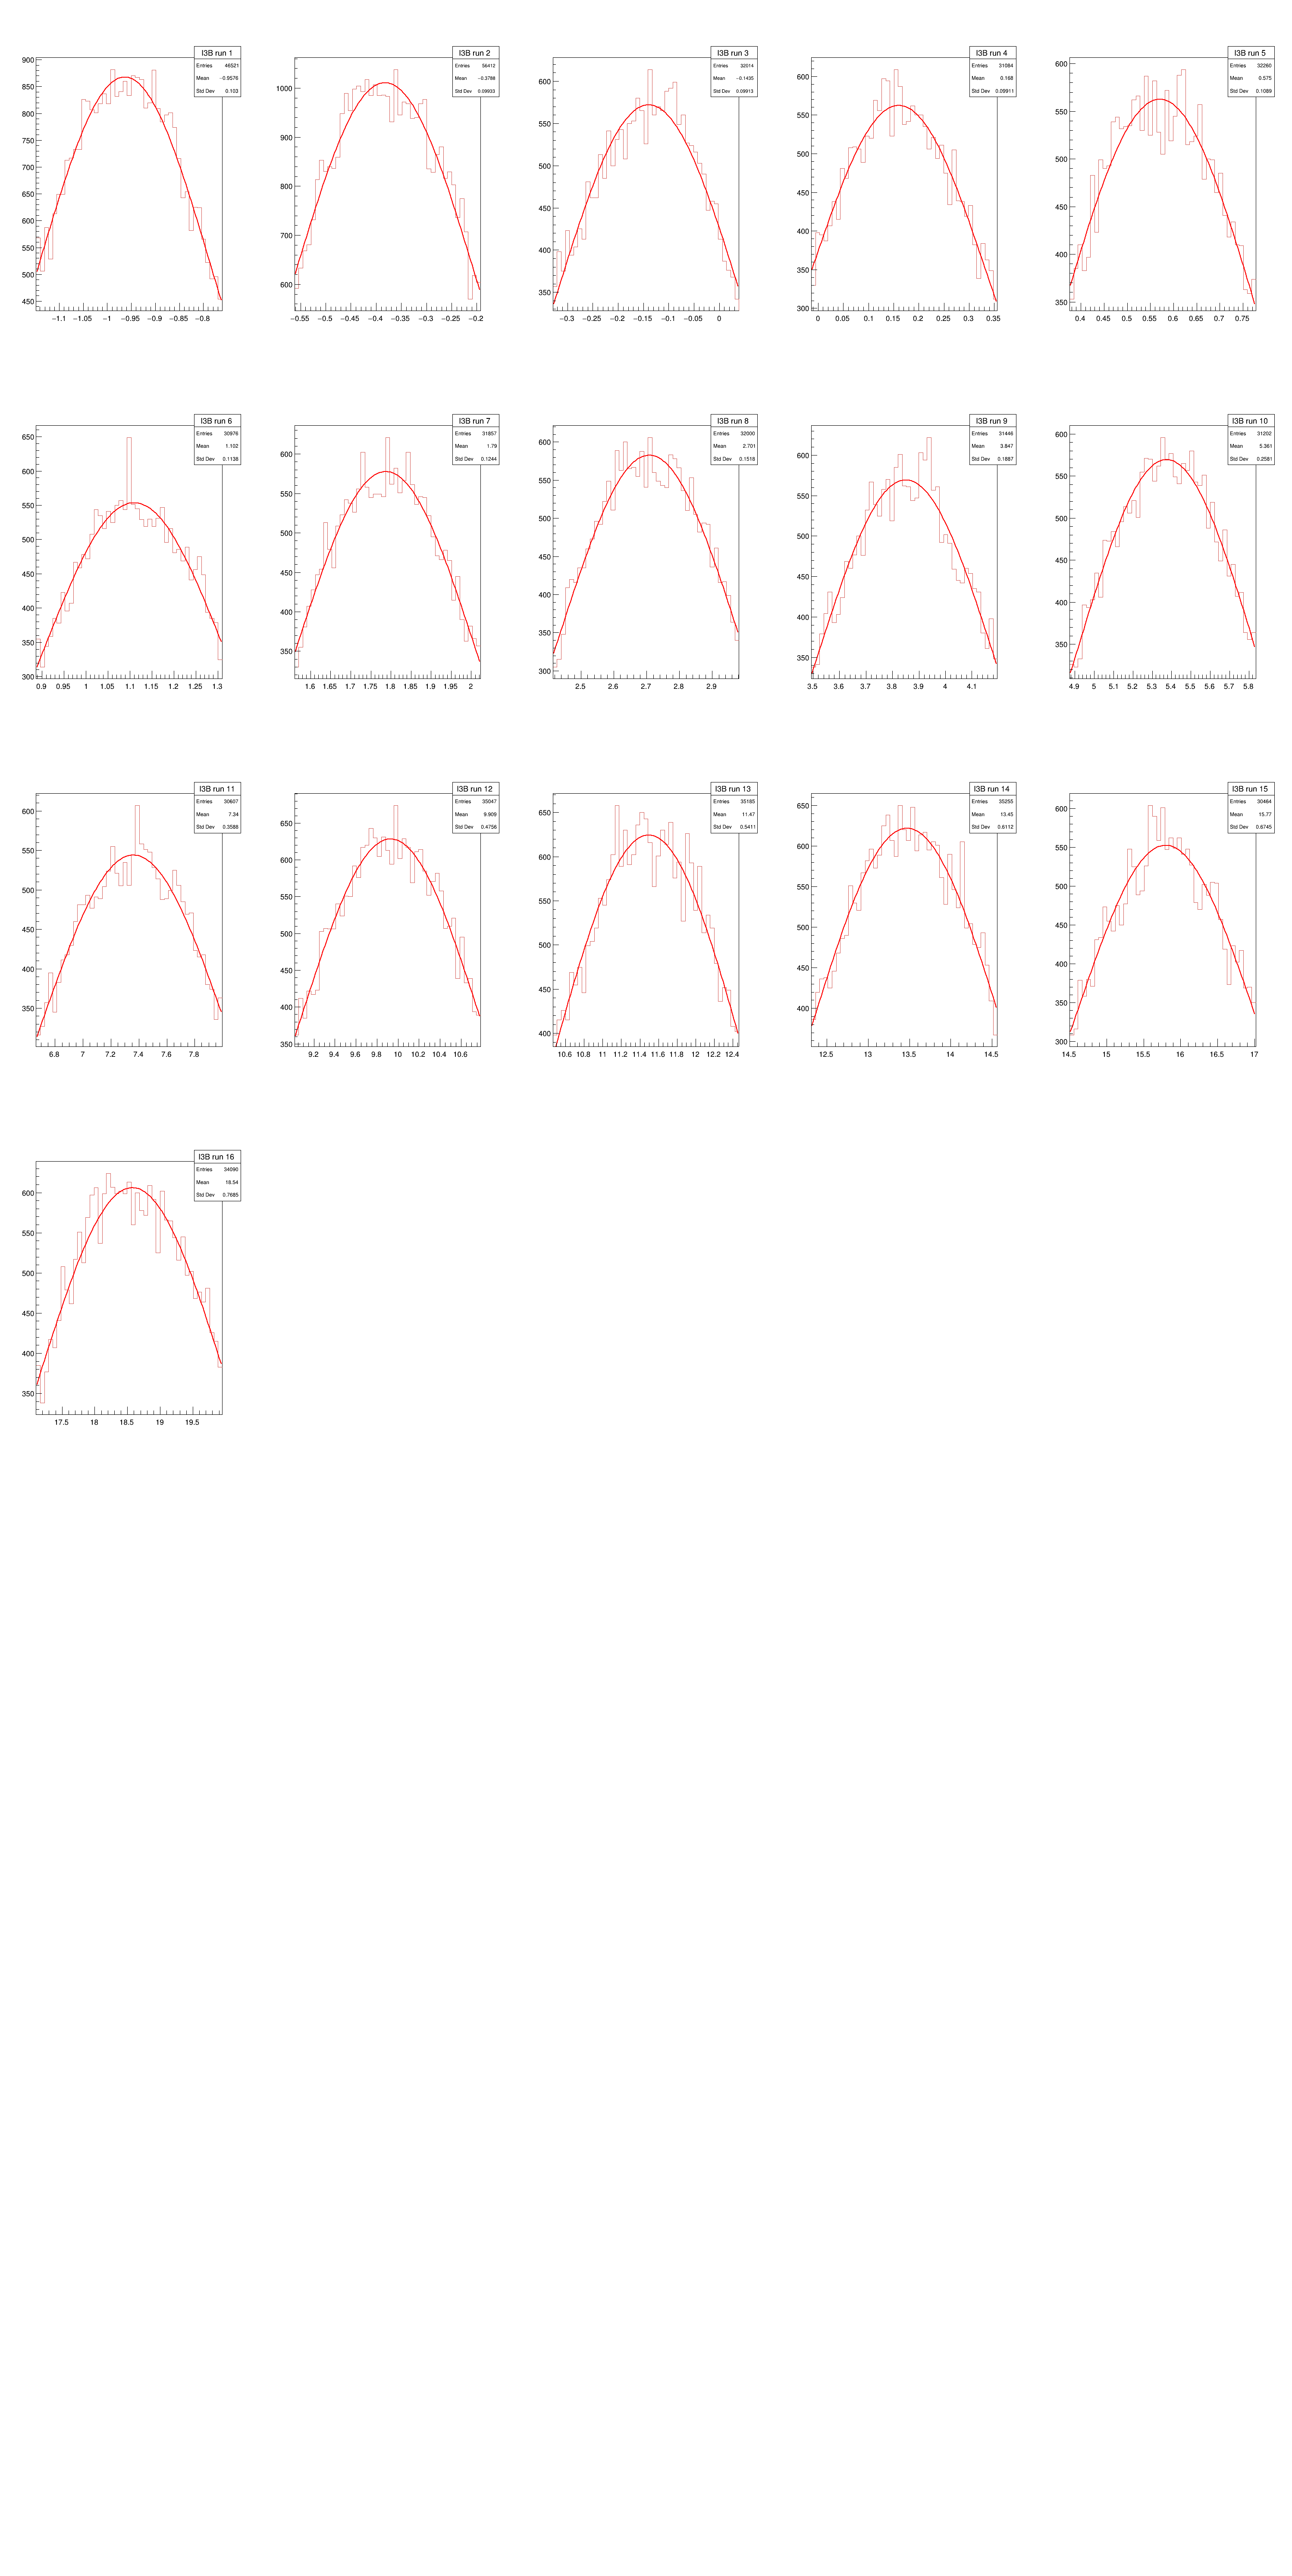

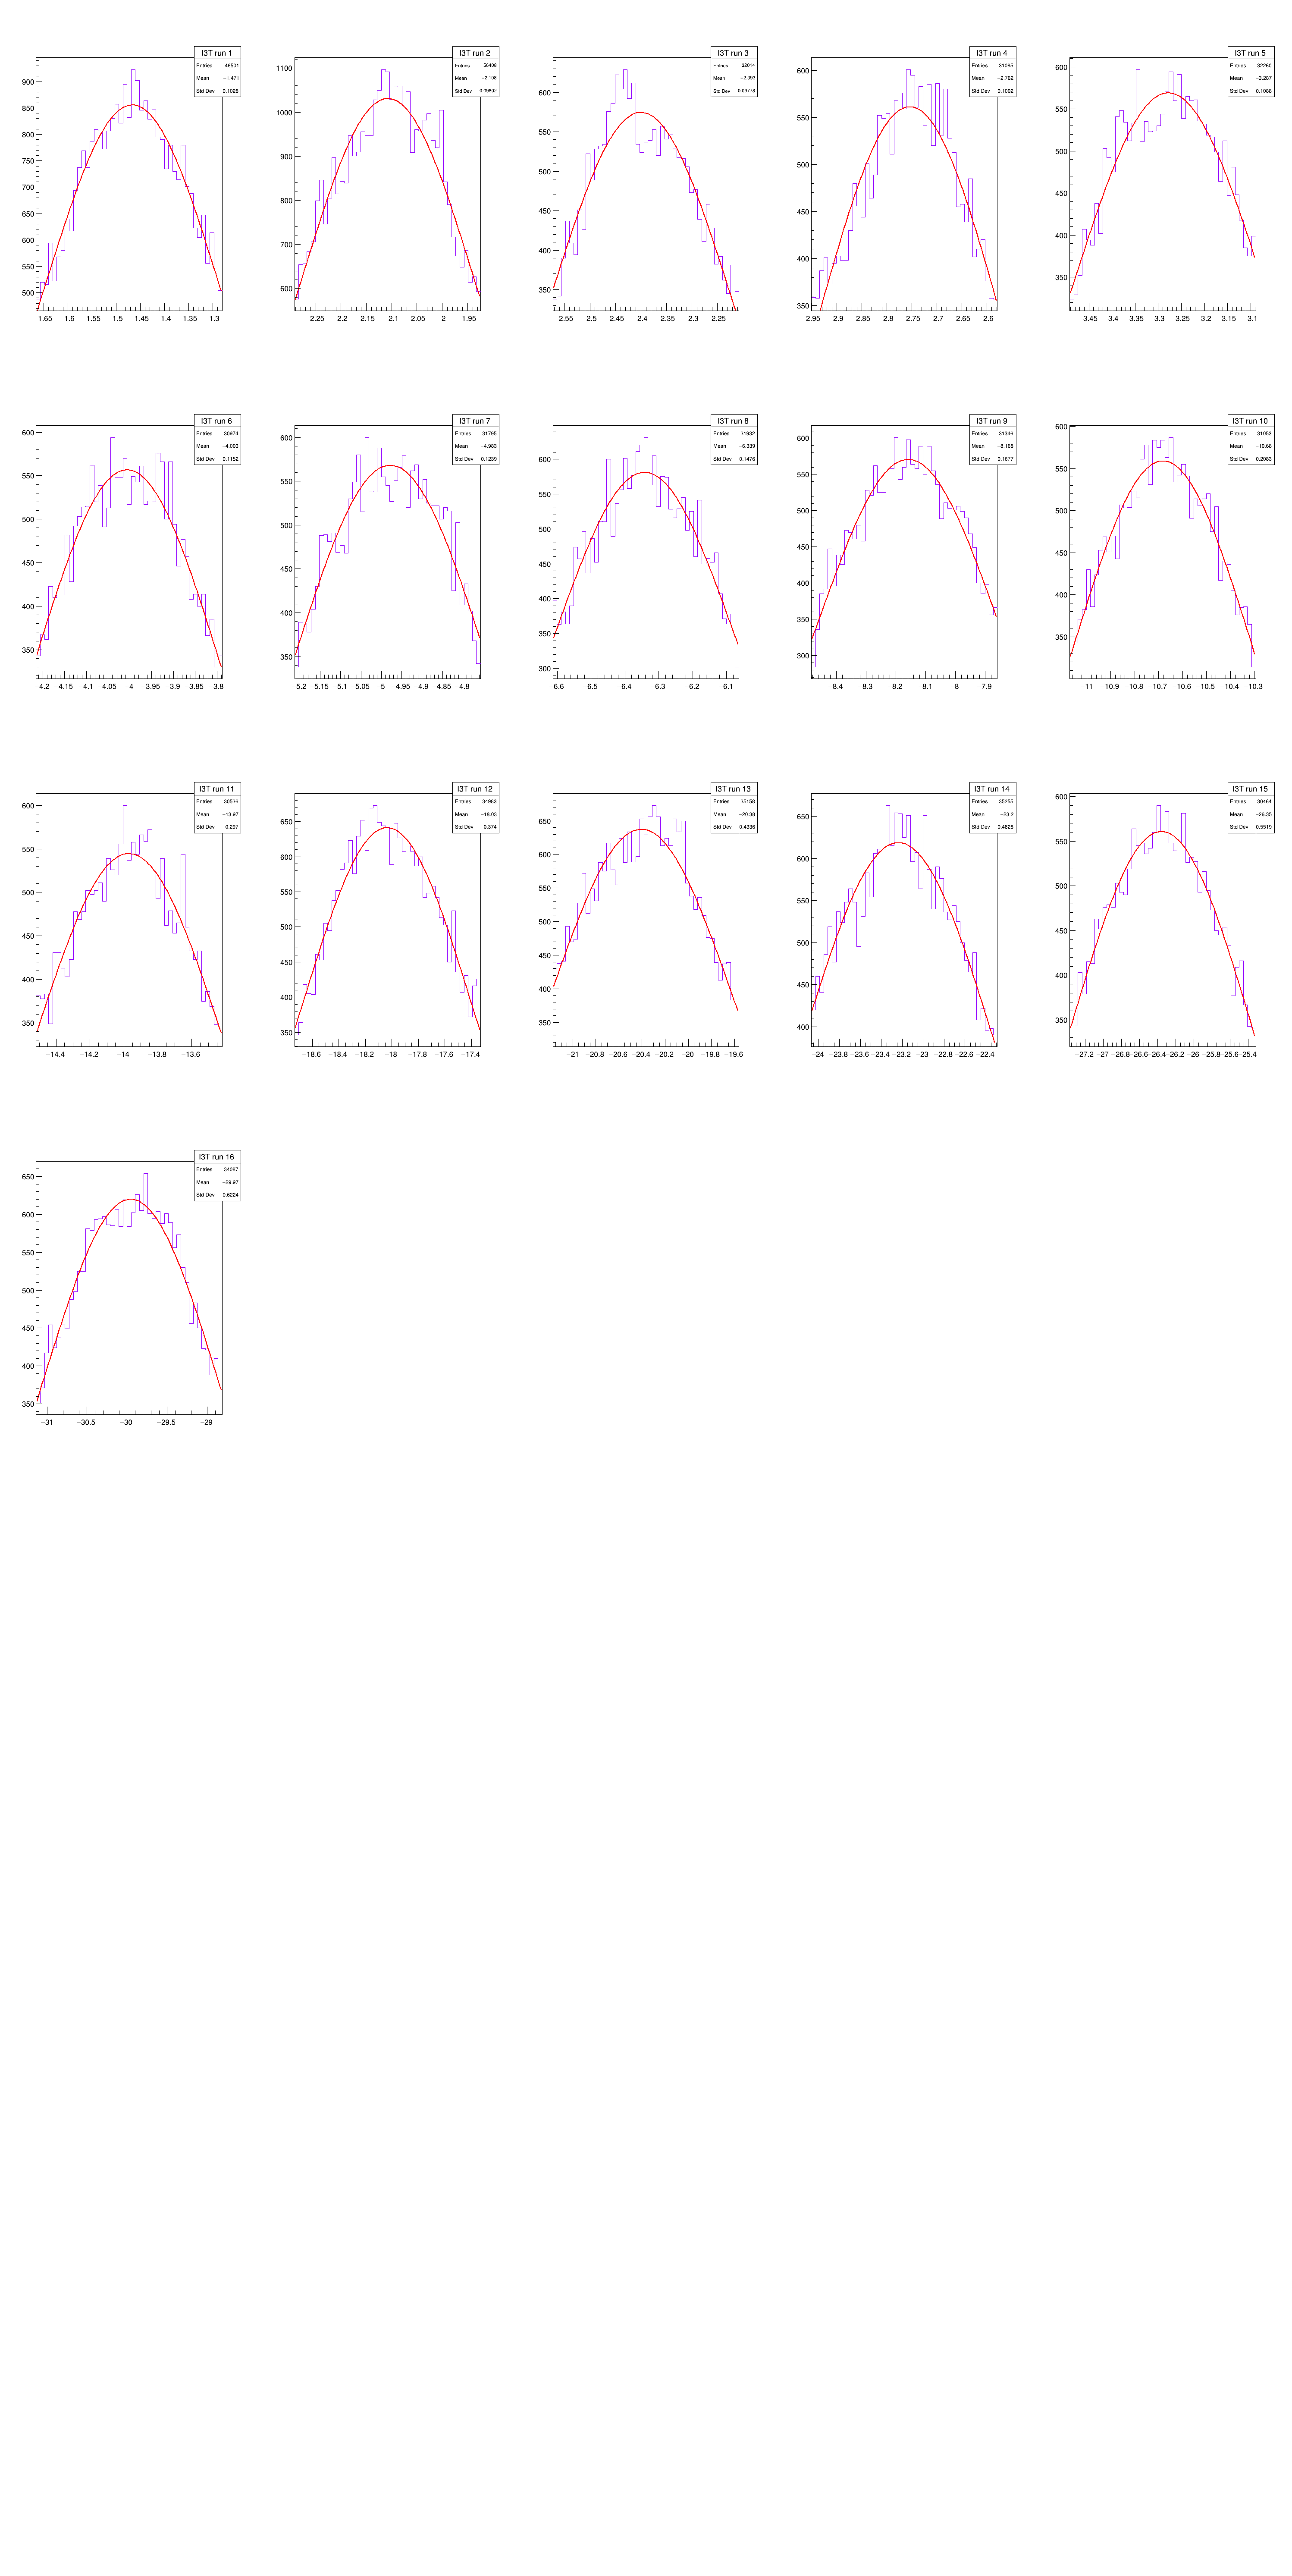

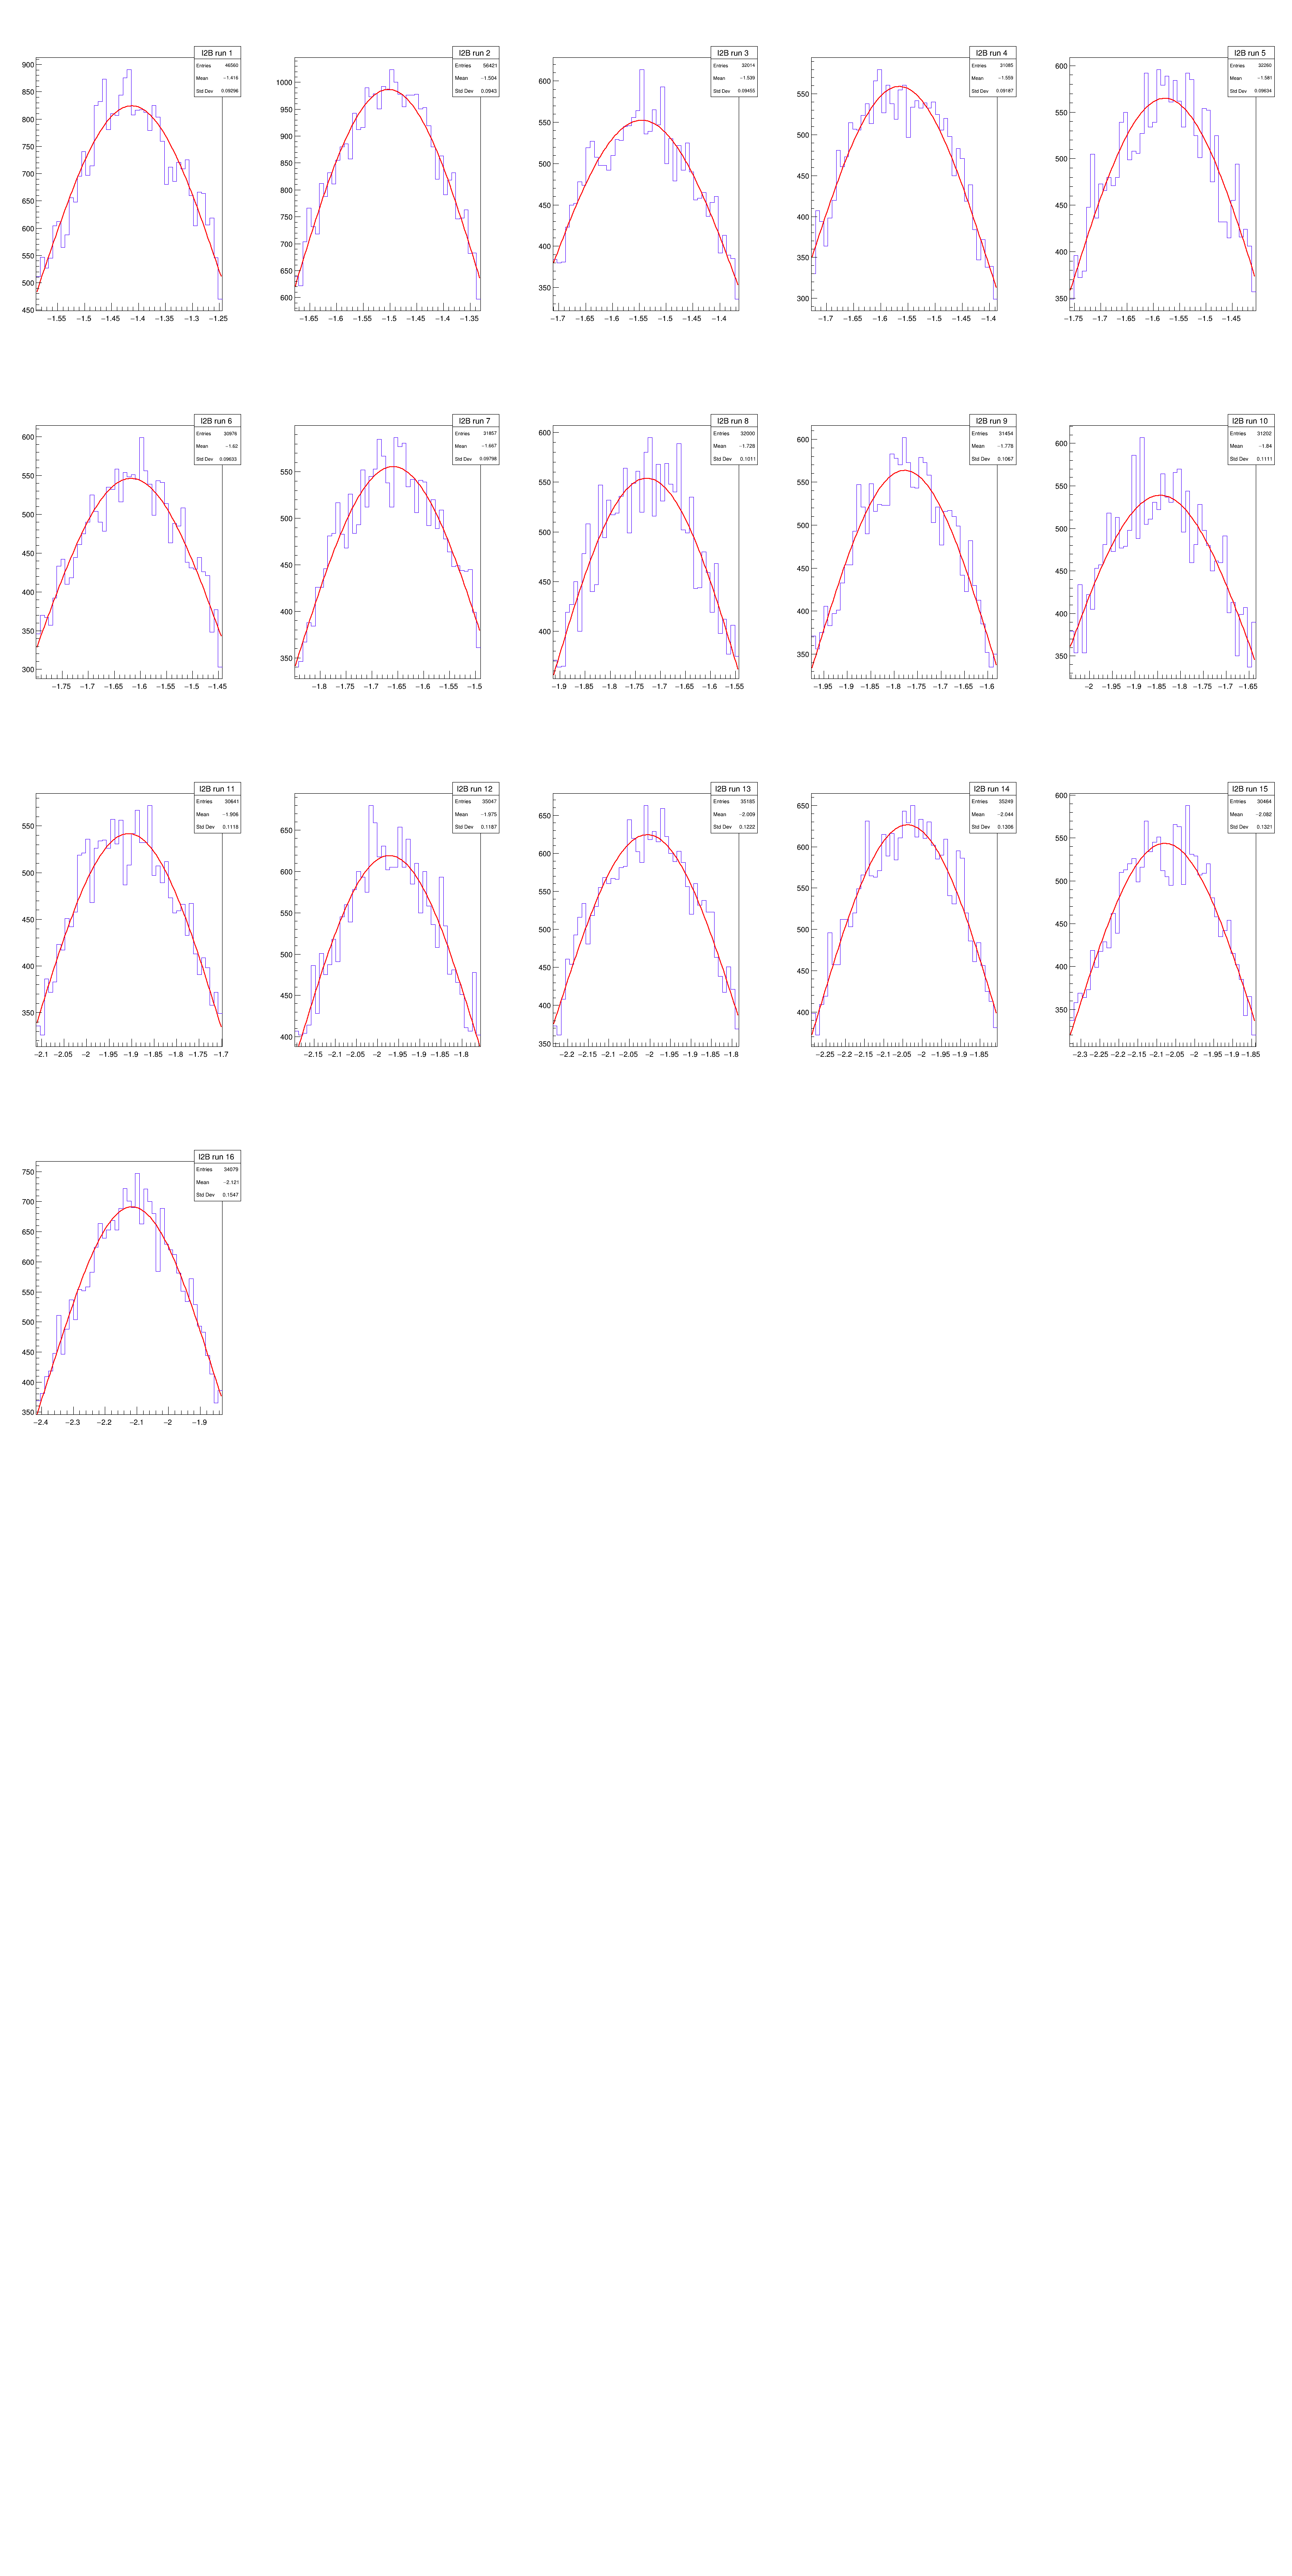

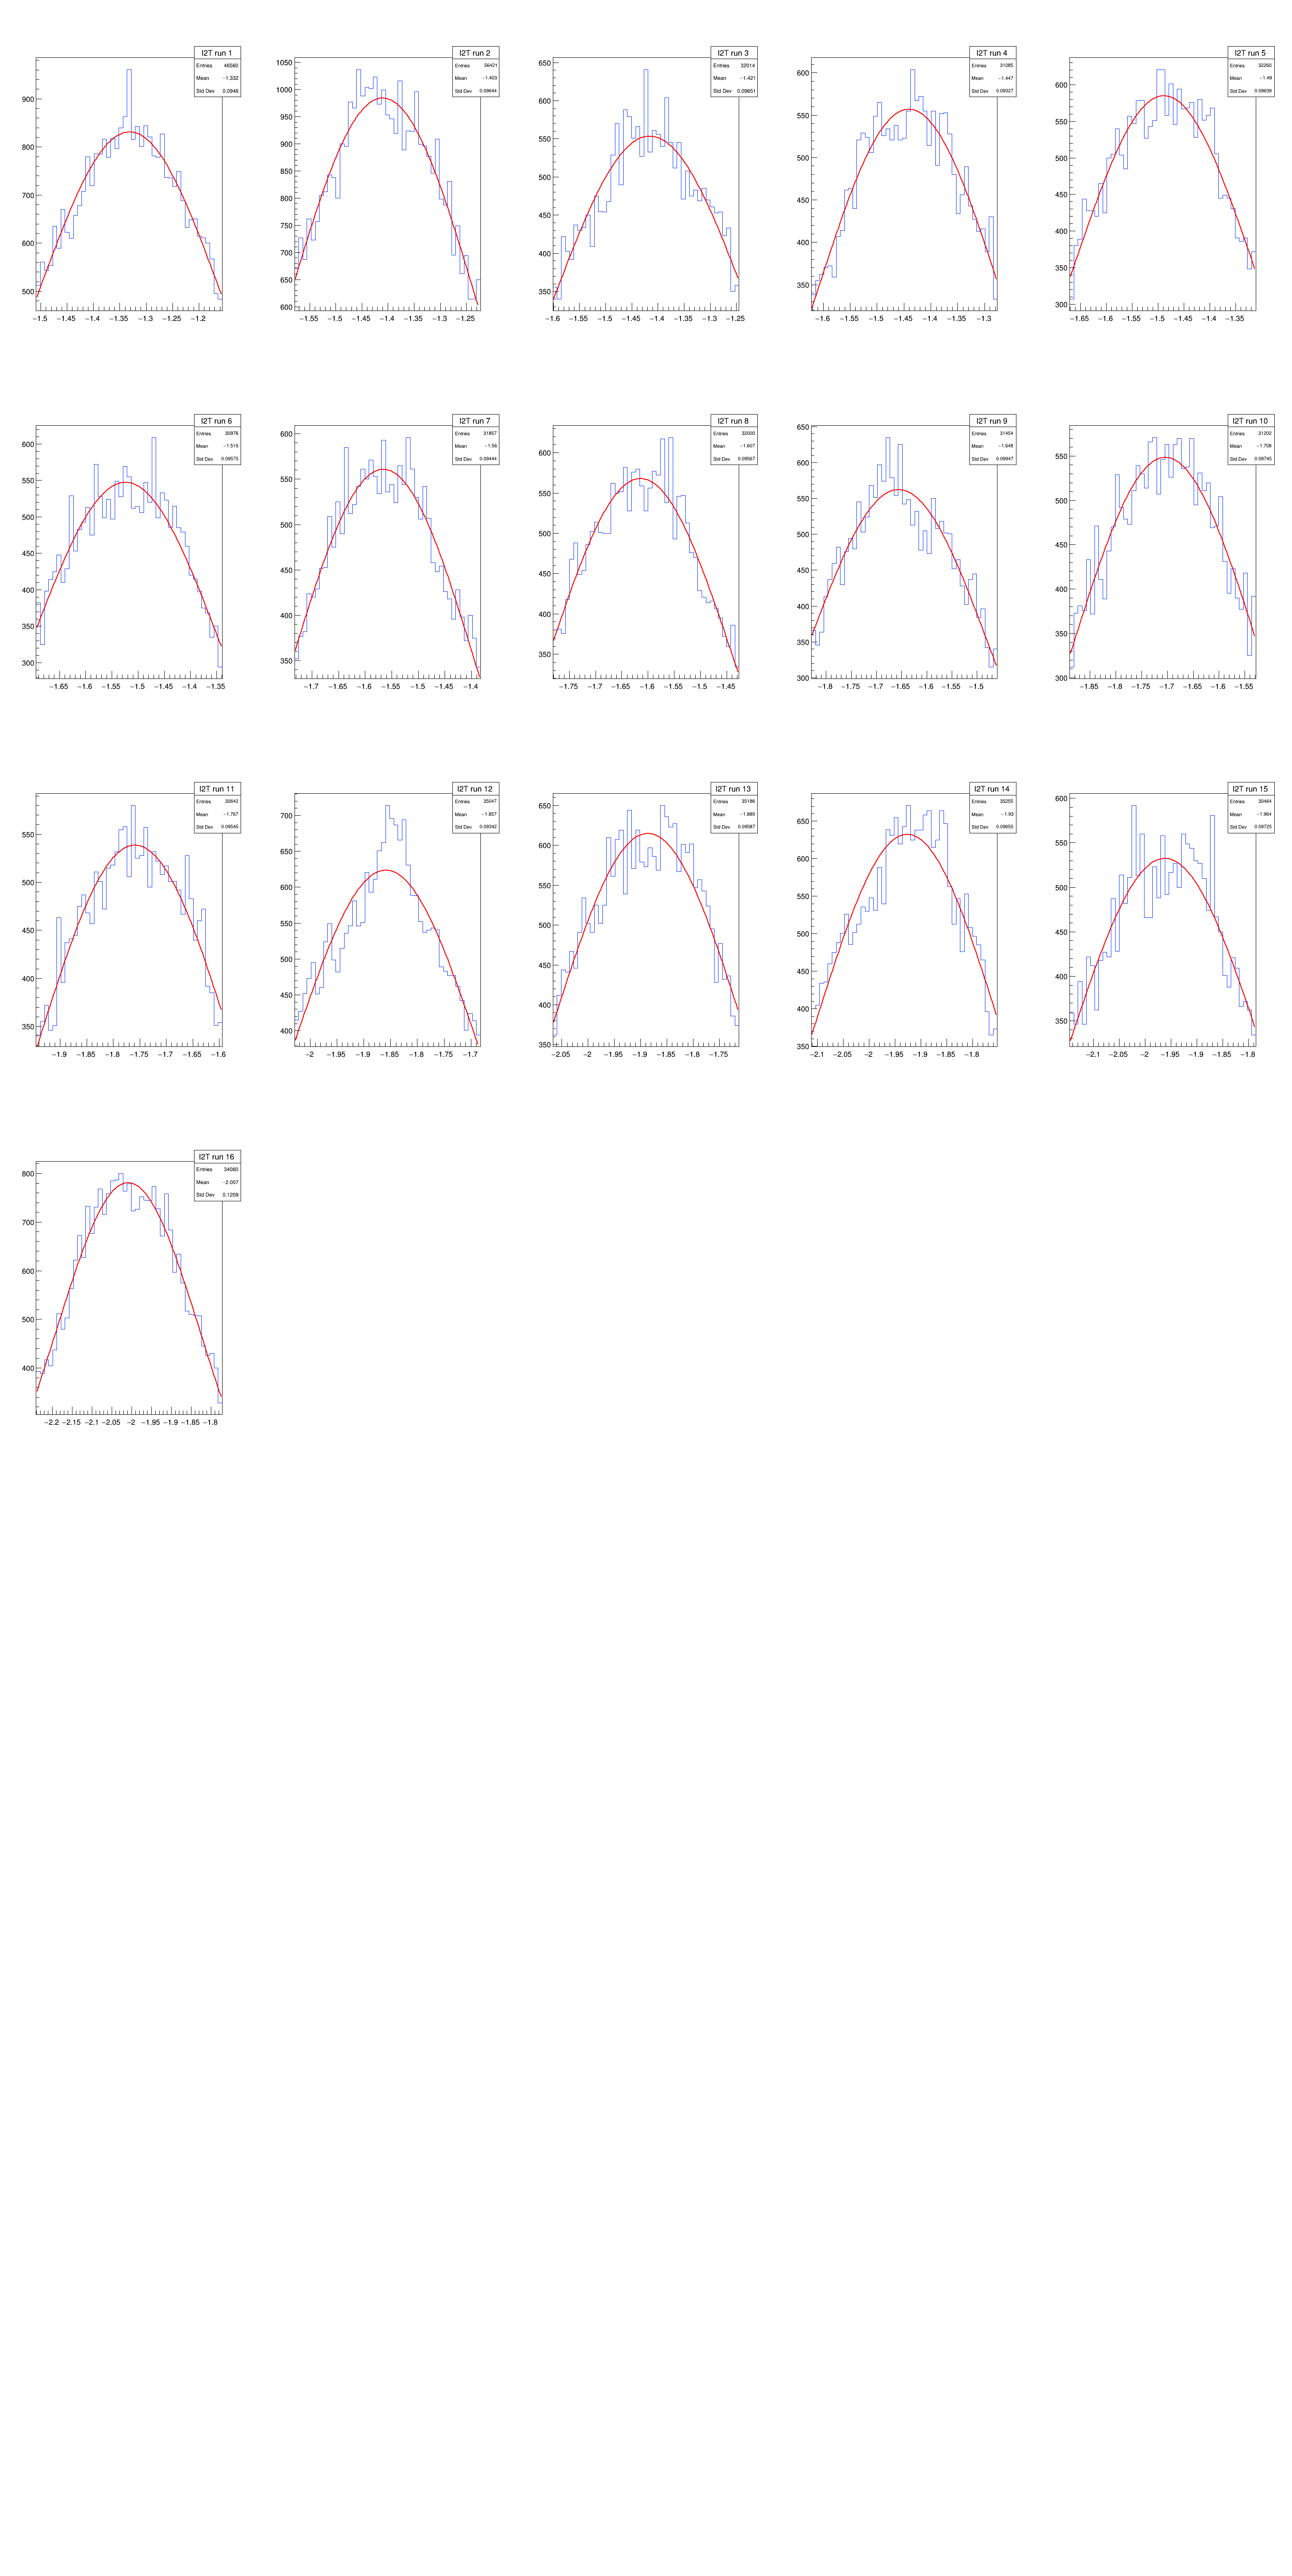

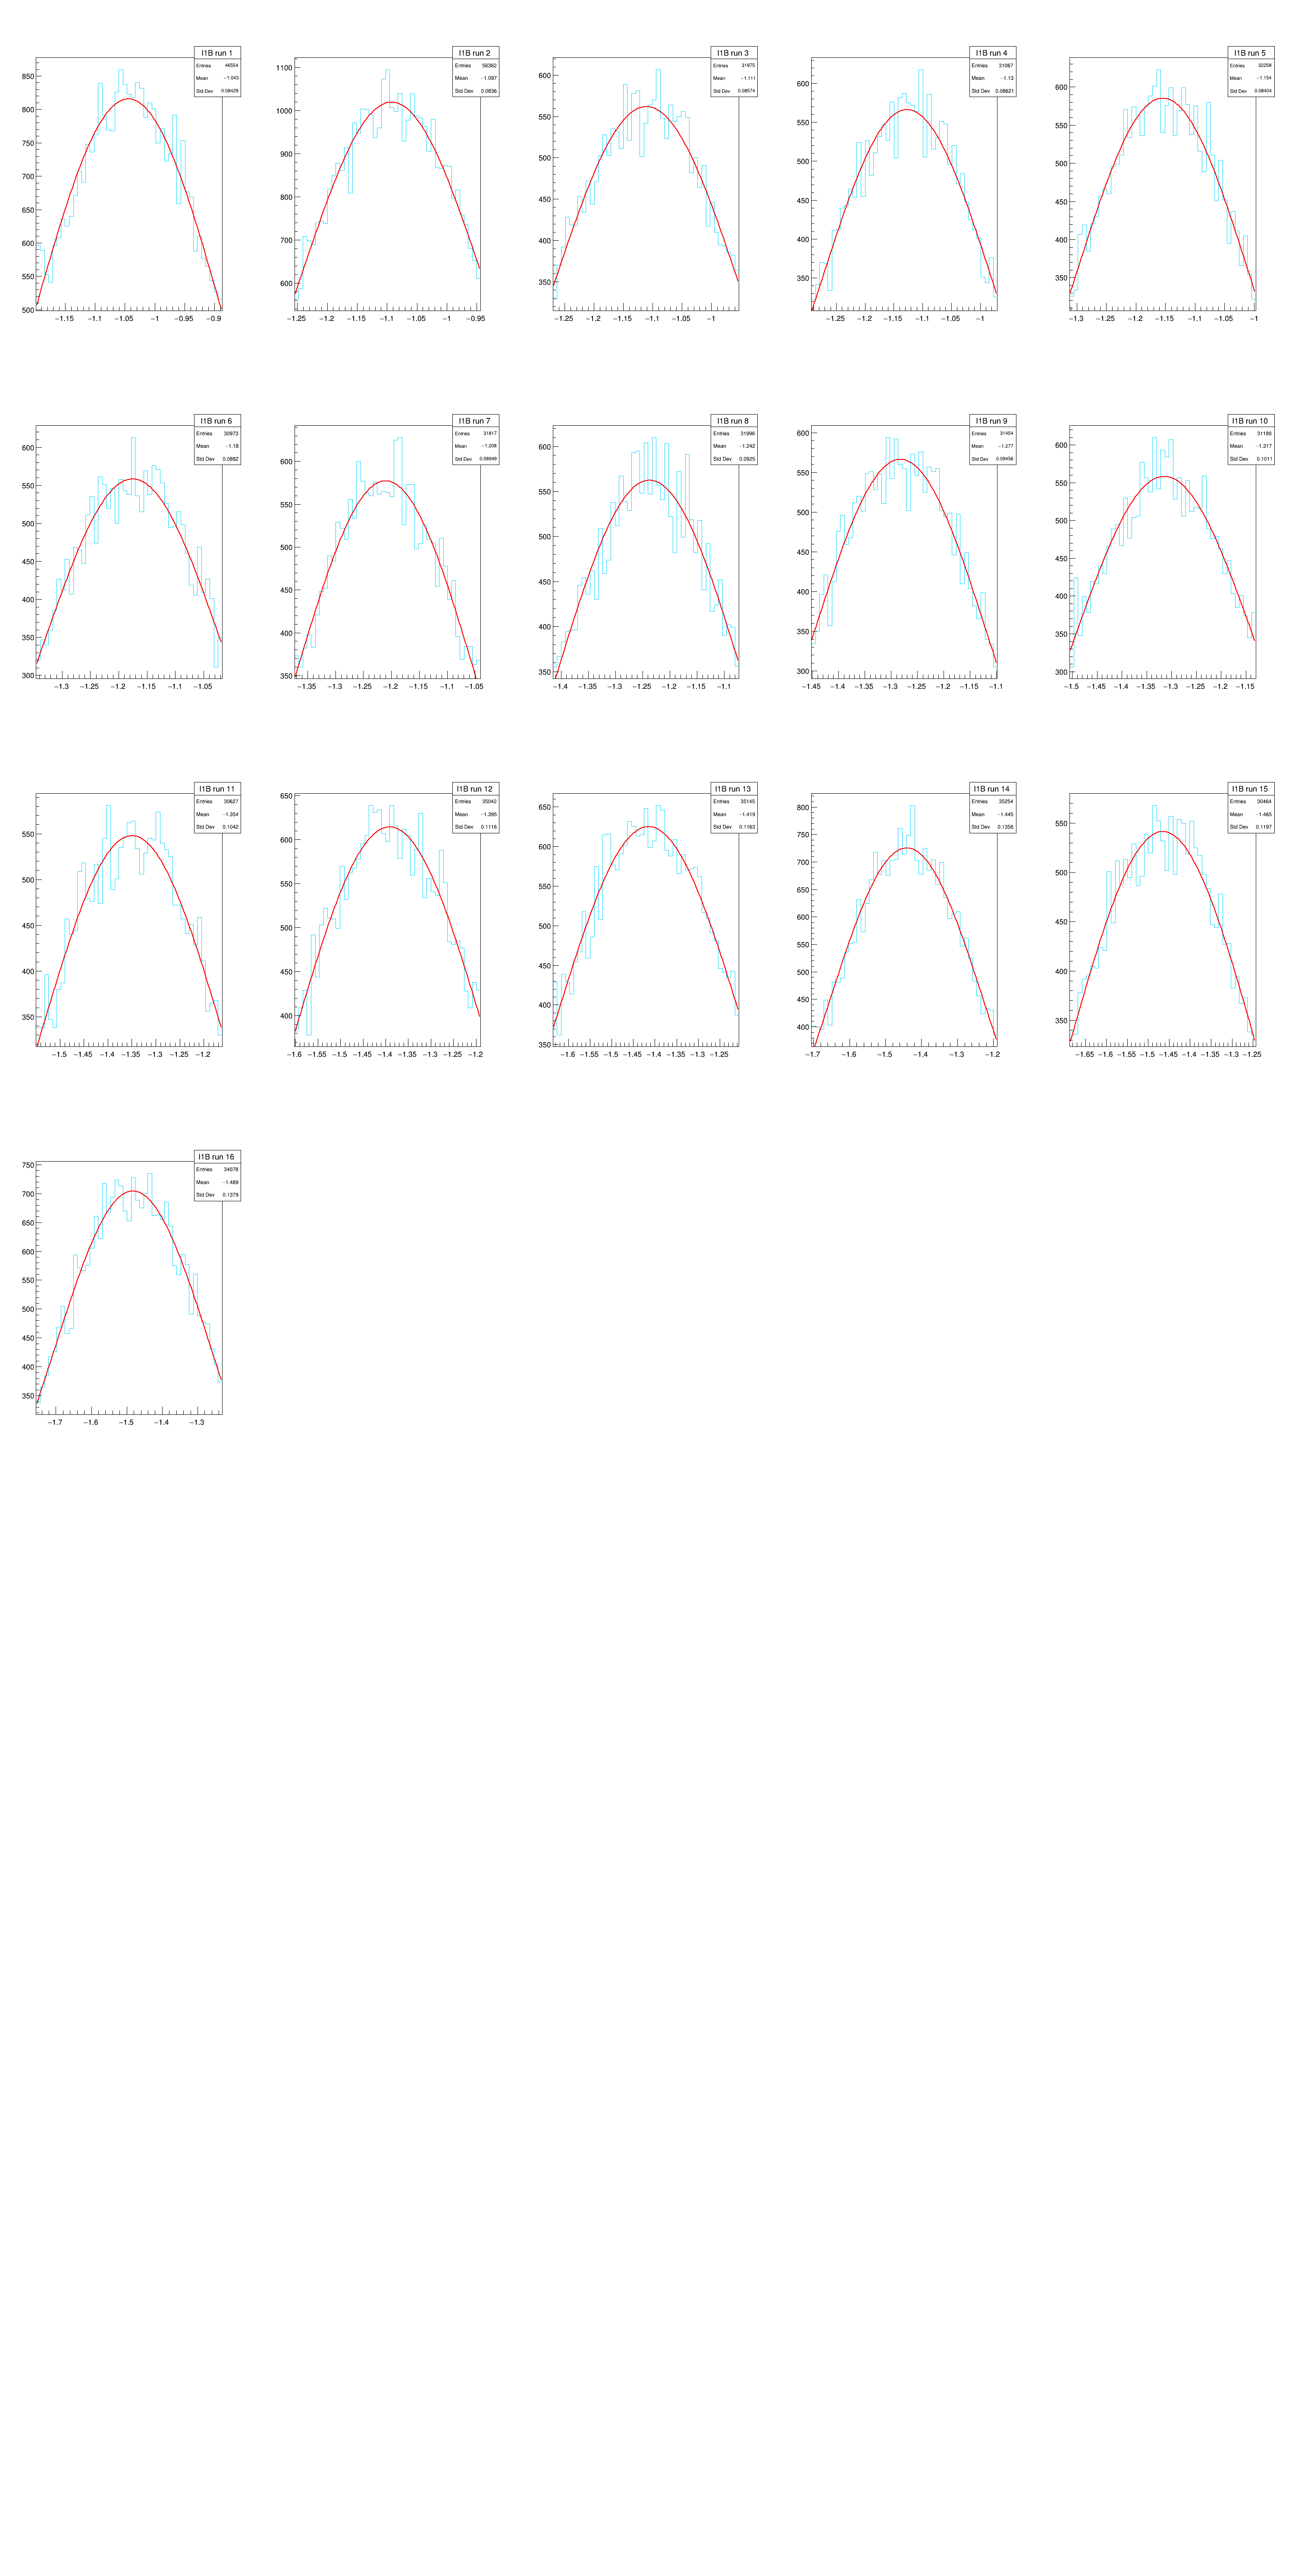

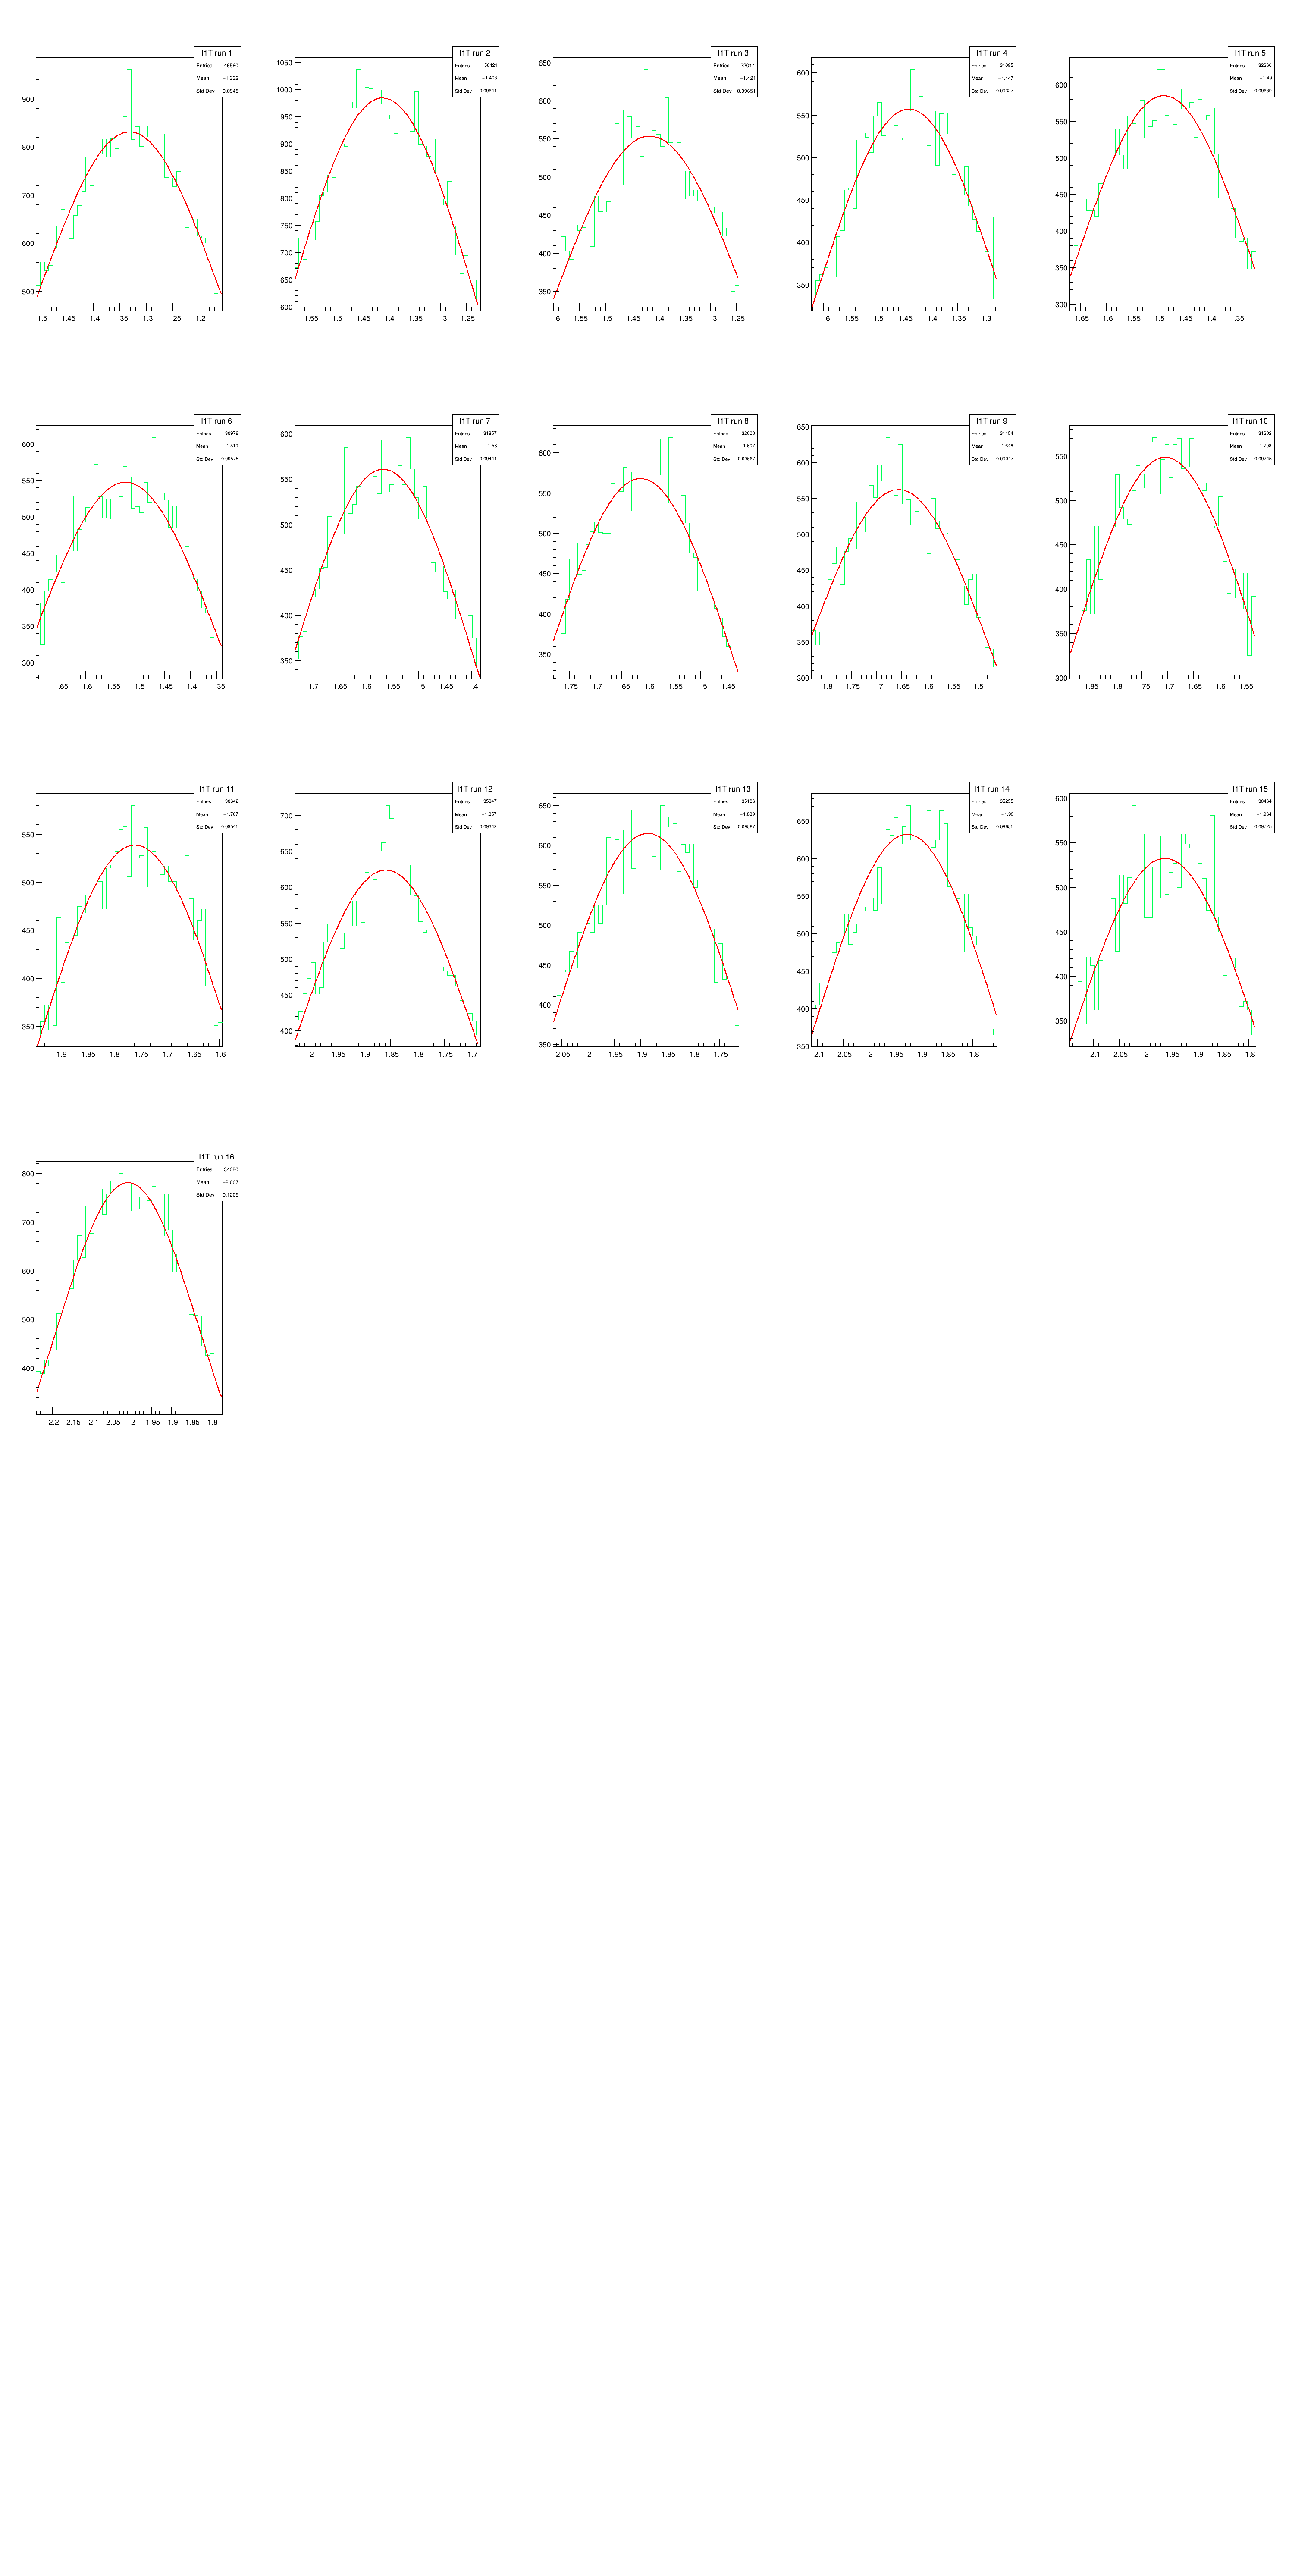

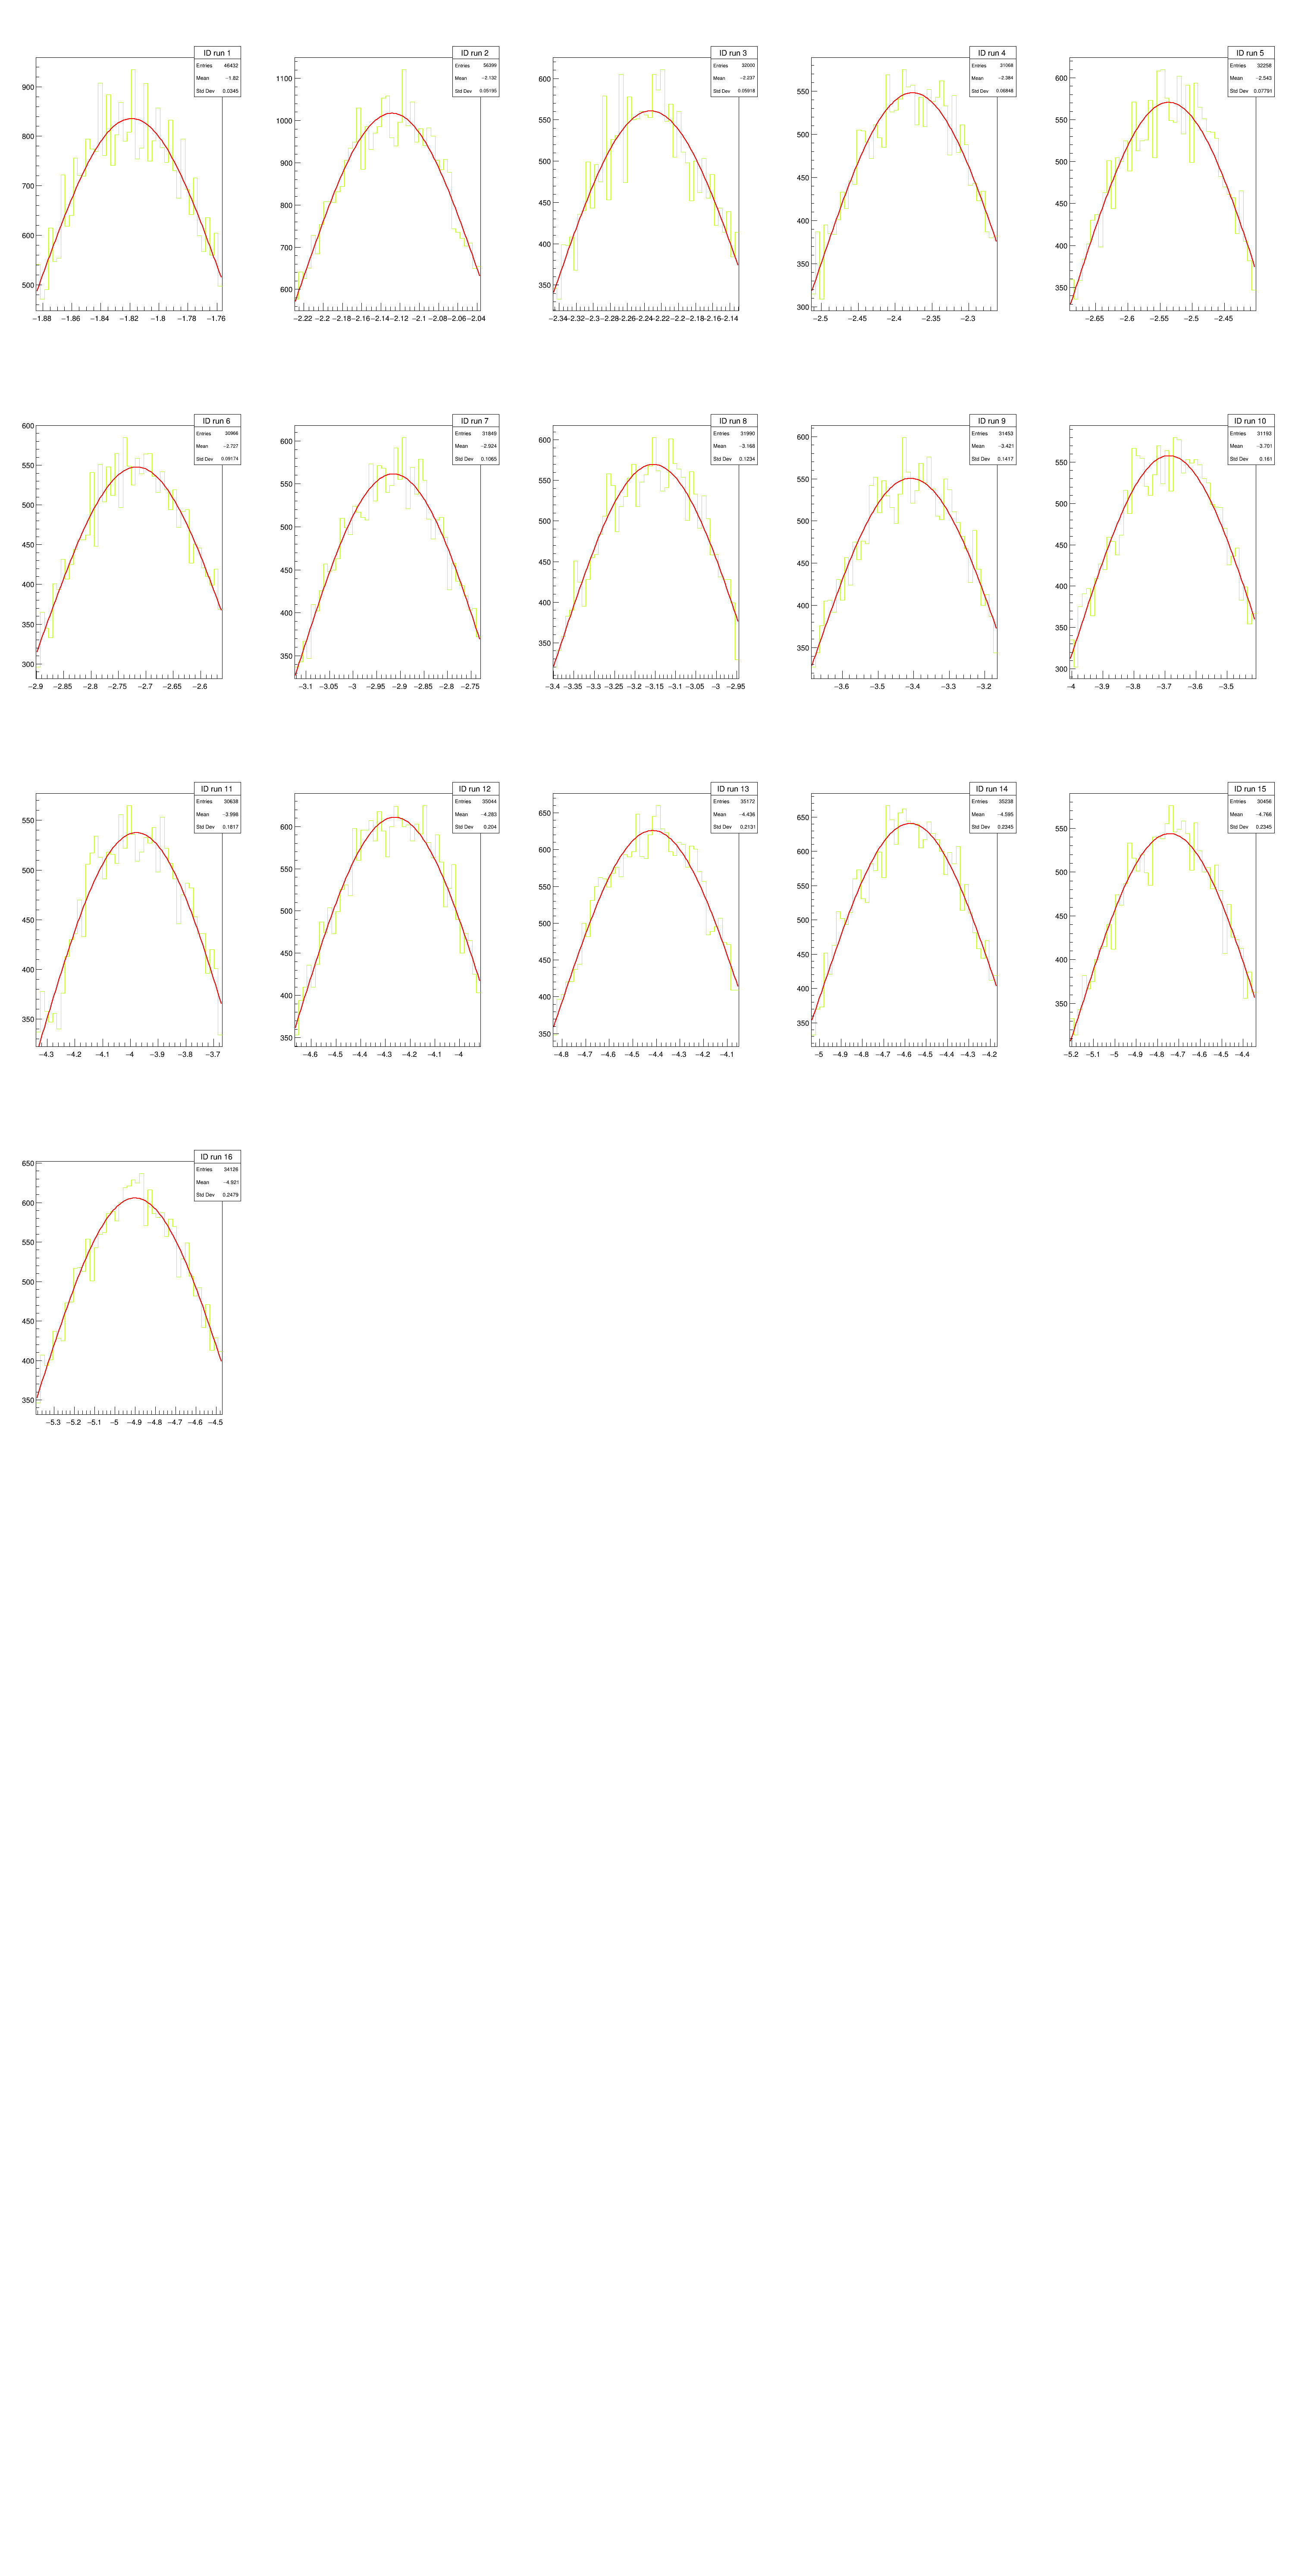

In [4]:
c = list(np.zeros(7))
j = 0
H = list(np.zeros(7))
ParI_gain = []
SigI_gain = []
Par_err_gain= []
Sig_err_gain = []

for i in colonne:
    c[j] = ROOT.TCanvas("", "", 3000, 6000)
    c[j].Divide(5,7)
    c[j].Draw()
    H[j], parI_gain, sigI_gain, par_err_gain, sig_err_gain =Functions.Do_histo(folder,Iname_gain, f1, i,"I3B", 85, c[j])
    ParI_gain.append(parI_gain)
    SigI_gain.append(sigI_gain)
    Par_err_gain.append(par_err_gain)
    Sig_err_gain.append(sig_err_gain)
    for k in range(len(Iname_gain)):
        H[j][k].SetLineColor(j*j+50)
        H[j][k].Draw()
    j+= 1

Warning in <TROOT::Append>: Replacing existing TH1: sum run 1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sum run 2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sum run 3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sum run 4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sum run 5 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sum run 6 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sum run 7 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sum run 8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sum run 9 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sum run 10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sum run 11 (Potential memory leak).
Warning in <TROOT::Append>: Replacing exi

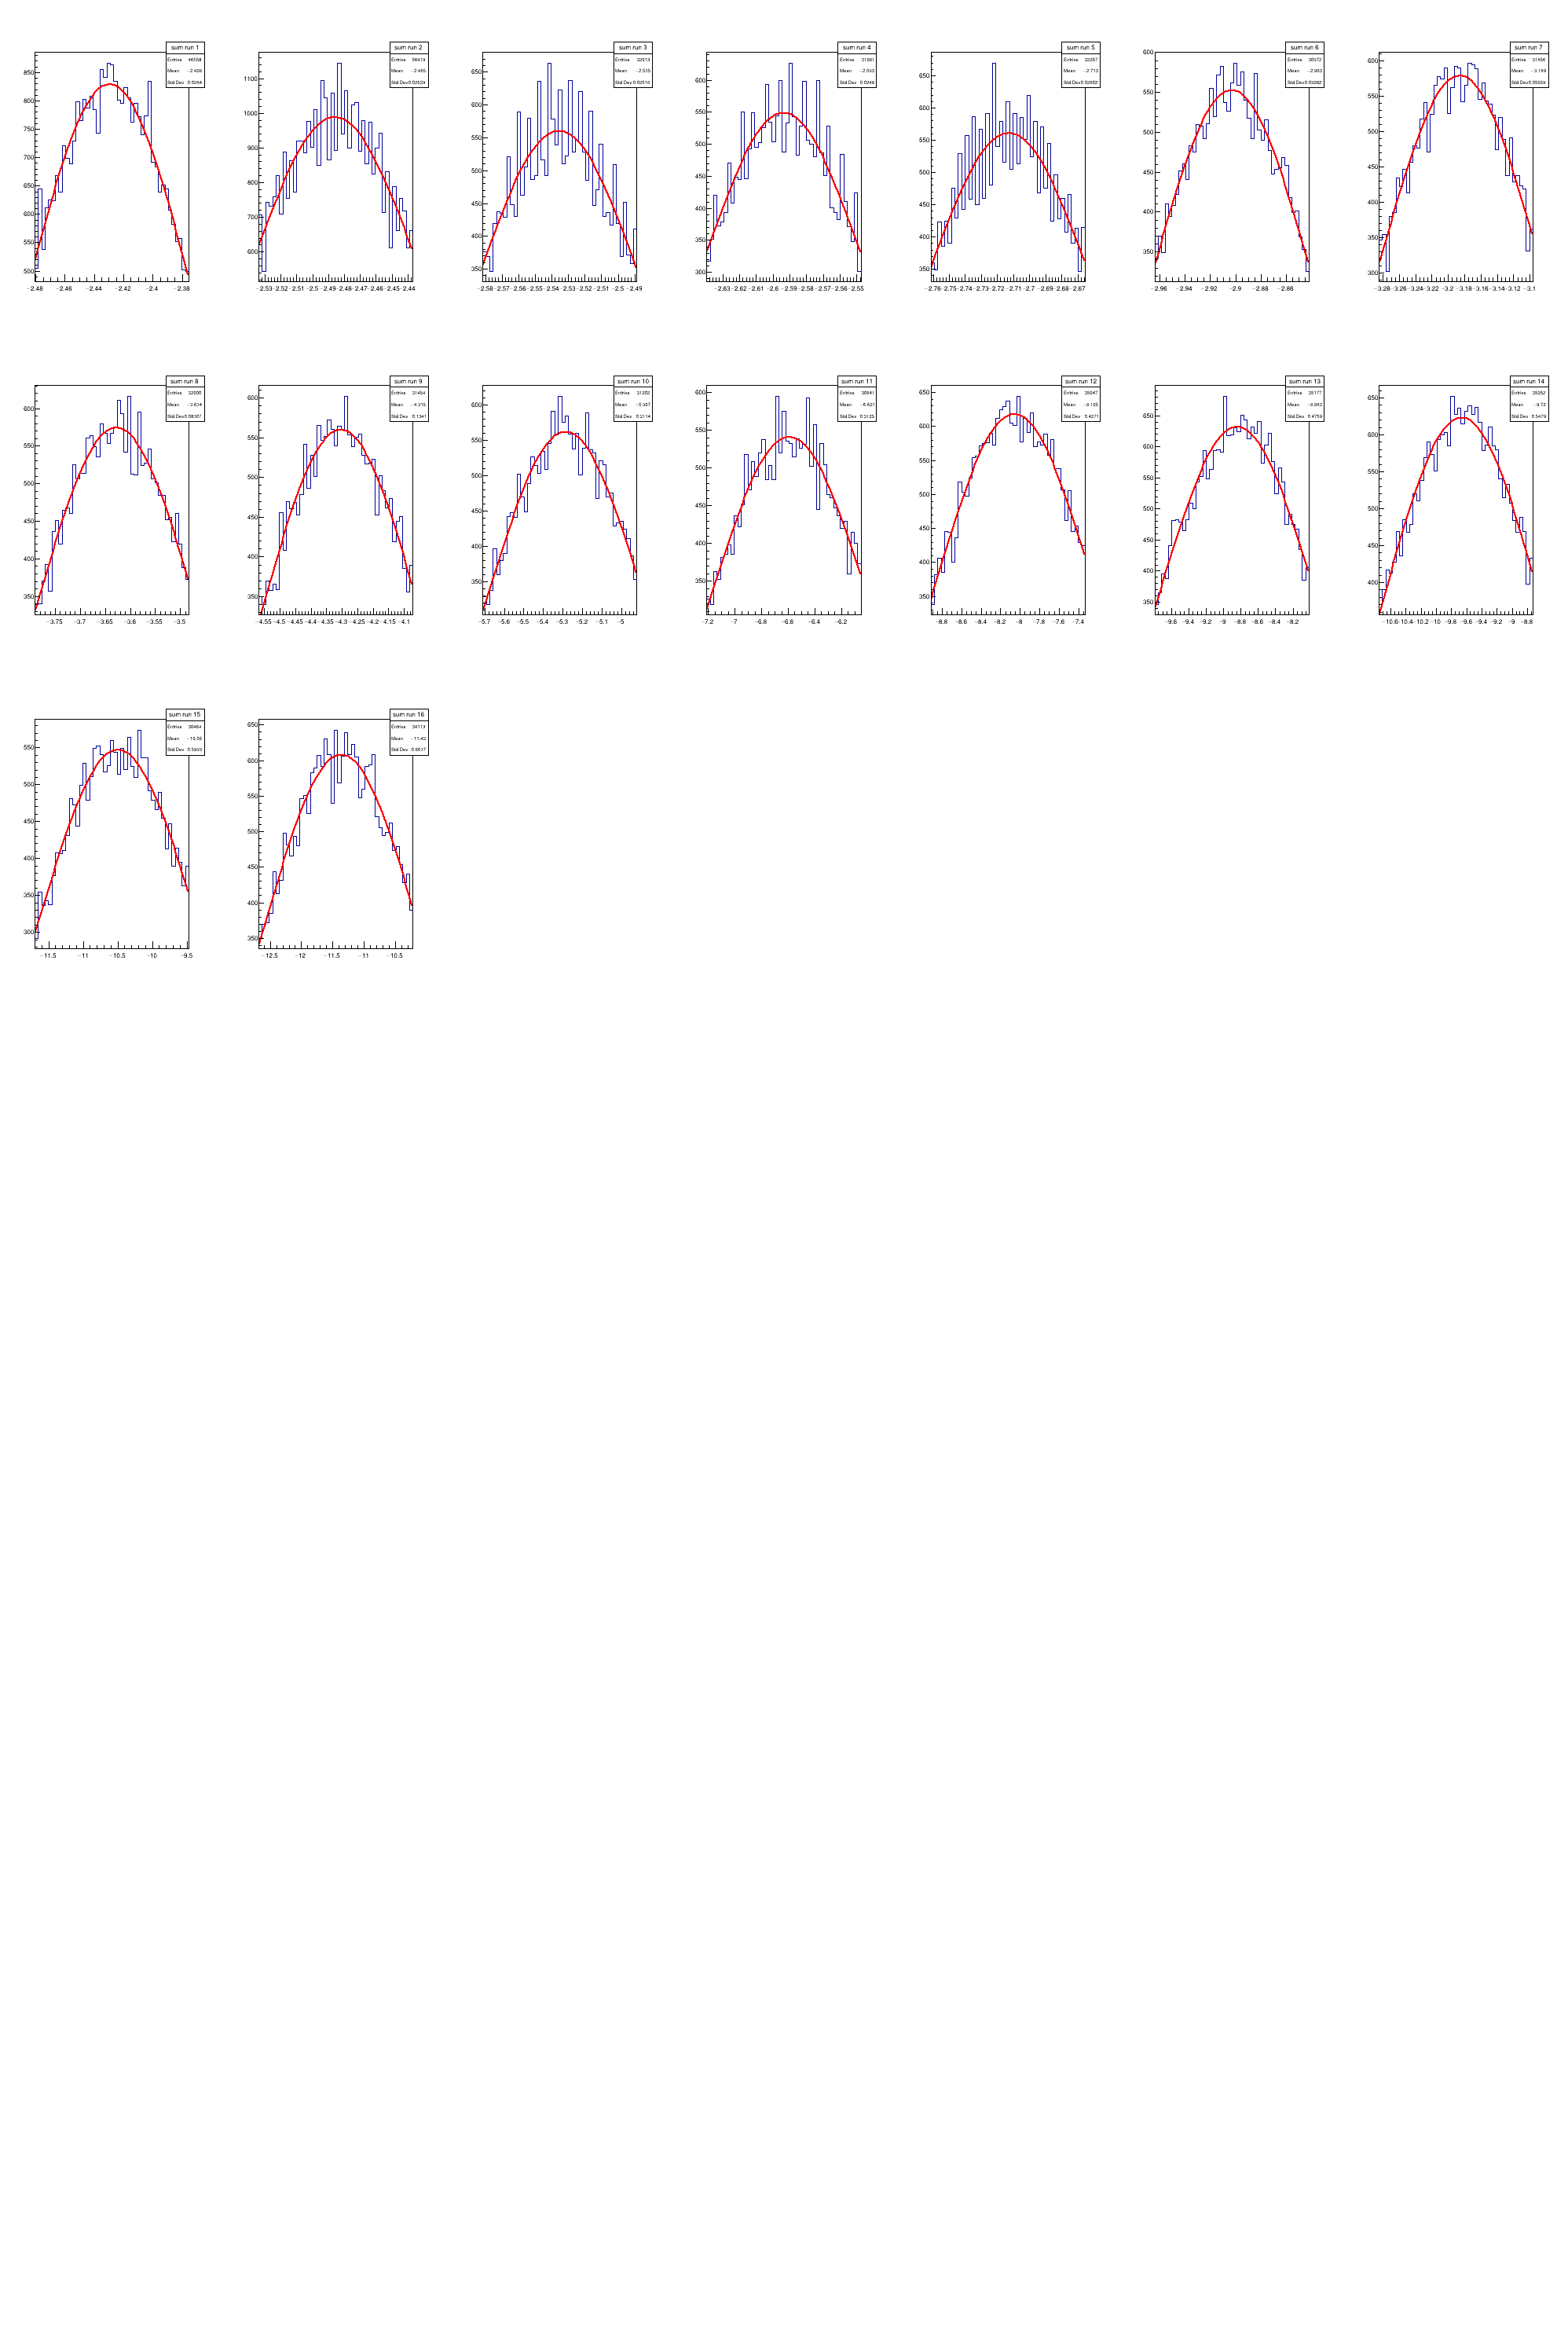

In [5]:
c = ROOT.TCanvas("","", 2000,3000)
c.Divide(7,7)
c.Draw()
H, parI_sum, sig_sum, par_err_sum, sig_err_sum =Functions.Do_histo_sum(folder,Iname_gain, f1, 1,"I3B", 50, c)
for i in range(len(H)):
    H[i].Draw()


In [6]:
Par_3b = np.array(ParI_gain[0])
Par_3t = np.array(ParI_gain[1])
Sig_3b = np.array(SigI_gain[0])
Sig_3t = np.array(SigI_gain[1])
Sig_err_3b = np.array(Sig_err_gain[0])
Sig_err_3t = np.array(Sig_err_gain[1])
Par_err_3b = np.array(Par_err_gain[0])
Par_err_3t = np.array(Par_err_gain[1])
Sig_sum = np.array(sig_sum)
Sig_err_sum = np.array(sig_err_sum)
#print(Sig_3b, Sig_3t)
Sig_quad = np.sqrt(Sig_3b**2 + Sig_3t**2)
Sig_err_quad = (np.sqrt((Sig_3b * Sig_err_3b)**2 + (Sig_3t * Sig_err_3t)**2))/(Sig_quad)

In [7]:
Vname_gain = []
for i in range(339,355):
    Vname_gain.append("PICO_V_run0" + str(i)+ ".csv")

parV_gain,sigV_gain = Functions.V_mean(folder, Vname_gain,1)
parVG1_gain, sigVG1_gain = Functions.V_mean(folder,Vname_gain, 3)
parVG2_gain, sigVG2_gain = Functions.V_mean(folder,Vname_gain, 5)
#print(Sig_quad)

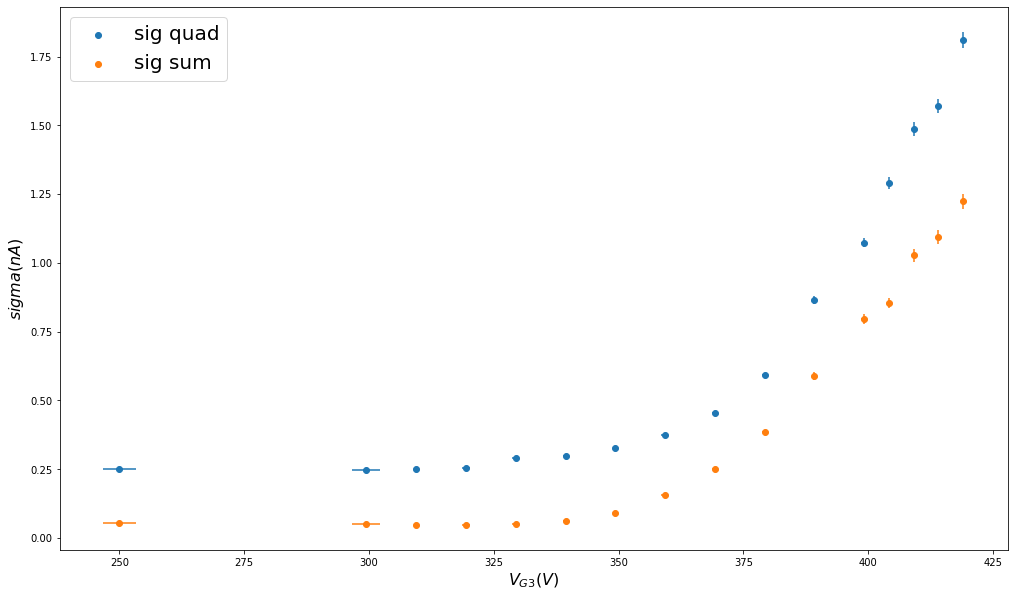

In [8]:
plt.figure(figsize = (17,10))
plt.scatter(parV_gain, Sig_quad, label ="sig quad")
plt.errorbar(parV_gain, Sig_quad, yerr = Sig_err_quad, xerr = sigV_gain, linestyle = " " )
plt.scatter(parV_gain, sig_sum, label = "sig sum")
plt.errorbar(parV_gain, sig_sum, yerr = sig_err_sum, xerr = sigV_gain, linestyle = " " )
plt.ylabel("$sigma (nA)$", size = 16)
plt.xlabel("$V_{G3} (V)$", size = 16)
plt.legend(fontsize = 20)
plt.savefig("Canvas/Noise.png")
plt.show()

all'inizio effetto correlato delle due correnti che cambiano insieme. Poi c'è un effetto di fisica che avviene assiem al guadagno però più da una parte che dall'altra. Il fattore correlato e scorrelato crescono entrambi altrimenti la sigma si spegnerebbe subito. Però il fattore scorrelato cresce di un fattore maggiore. 

$Blu - Orange = \sigma^2_{Corr,T,B} + \sigma^2_{Corr,B,B} = 2 \sigma_{Corr}^2$
$\sqrt{Blu^2-Orange^2} = \sqrt{2} \sigma_{Corr}$



[0.17315461 0.1715124  0.17455413 0.17649748 0.20337781 0.20520431
 0.22258188 0.24216349 0.2688879  0.31709907 0.44694134 0.51007463
 0.68539384 0.7603808  0.79589862 0.94409409]


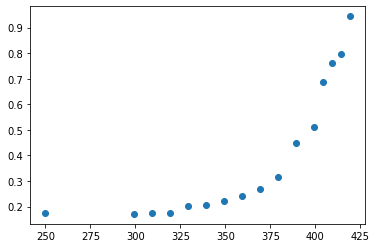

In [12]:
Sig_sum = np.array(sig_sum)
#print(type(Sig_err_quad))
sigma_corr = np.sqrt(Sig_quad**2-Sig_sum**2)/sqrt(2)
print(sigma_corr)
sig_err_corr = (np.sqrt((Sig_quad*Sig_err_quad)**2 -(Sig_sum * Sig_err_sum)**2 ))/(sigma_corr)
sigma_T_fis =[]
for i in range(len(Sig_3t)):
    x = max(0, Sig_3t[i]**2-sigma_corr[i]**2)
    sigma_T_fis.append(np.sqrt(x))

sigma_B_fis = []
for i in range(len(Sig_3b)):
    x = max(0, Sig_3b[i]**2-sigma_corr[i]**2)
    sigma_B_fis.append(np.sqrt(x))
#print(sigma_T_fis)
#print(sigma_B_fis)
#print(Sig_3t)
#print(sigma_corr)
sigma_err_fis_3t = np.sqrt(abs((Sig_3t * Sig_err_3t)**2 - (sigma_corr * sig_err_corr)**2))/(sigma_corr)
sigma_err_fis_3b = np.sqrt(abs((Sig_3t * Sig_err_3t)**2 - (sigma_corr * sig_err_corr)**2))/(sigma_corr)
plt.scatter(parV_gain,sigma_corr)
plt.show()

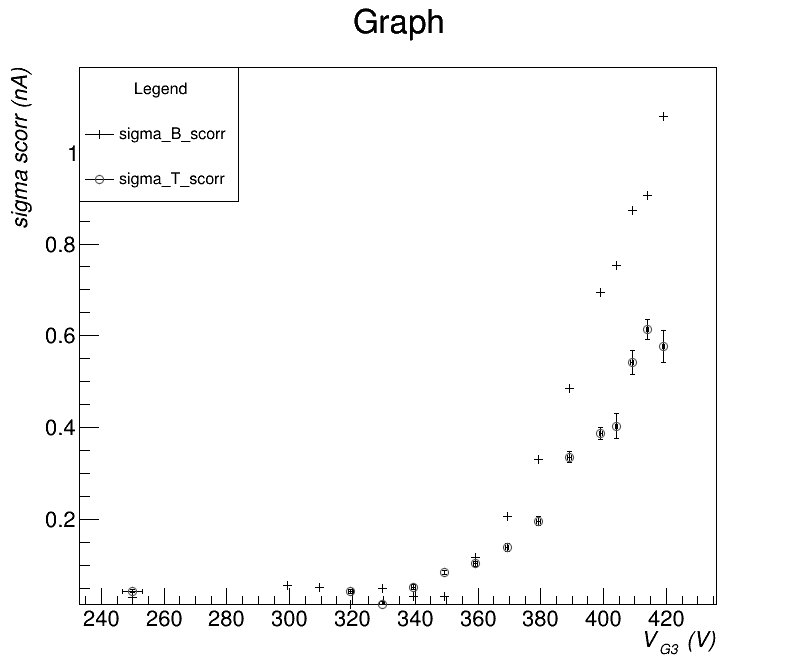

In [10]:
%jsroot off
c= ROOT.TCanvas("","",800,700)
Graph1 = ROOT.TGraph(len(sigma_B_fis), array.array("f", parV_gain), array.array("f", sigma_B_fis))
Graph3 = ROOT.TGraphErrors(len(sigma_B_fis), array.array("f", parV_gain), array.array("f", sigma_B_fis), 
                           array.array("f", sigV_gain), array.array("f", sigma_err_fis_3b))
Graph1.SetMarkerStyle(2)
Graph1.GetYaxis().SetTitle("#it{sigma scorr (nA)}")
Graph1.GetXaxis().SetTitle("#it{V_{G3} (V)}")
Graph2 = ROOT.TGraph(len(sigma_T_fis), array.array("f", parV_gain), array.array("f", sigma_T_fis))
Graph3 = ROOT.TGraphErrors(len(sigma_T_fis), array.array("f", parV_gain), array.array("f", sigma_T_fis), 
                           array.array("f", sigV_gain), array.array("f", sigma_err_fis_3t))
Graph2.SetMarkerStyle(4)
Graph2.SetMarkerColor(12)
c.Draw()
Graph1.Draw("AP")
Graph3.Draw("SAMEP")
Graph2.Draw("SAMEP")
Leg = ROOT.TLegend(0.1,0.7,0.3,0.9)
Leg.SetHeader("Legend","C")
Leg.AddEntry(Graph1, "sigma_B_scorr")
Leg.AddEntry(Graph2, "sigma_T_scorr")
Leg.Draw()

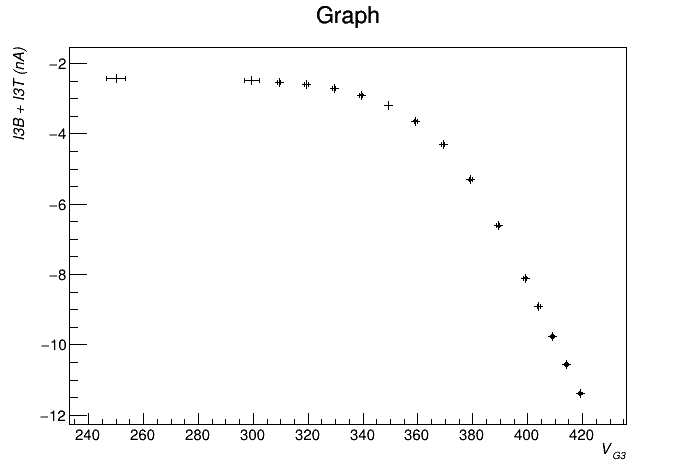

In [11]:
%jsroot off
parI = (np.array(Par_3b) + np.array(Par_3t))
c= ROOT.TCanvas()
err = np.sqrt(Par_err_3b**2 + Par_err_3t**2)
graph1 = ROOT.TGraph(len(parI), array.array("f",parV_gain), array.array("f",parI))
graph2 = ROOT.TGraphErrors(len(parI), array.array("f", parV_gain), array.array("f", parI), array.array("f", sigV_gain), 
                          array.array("f", err))
c.Draw()
graph1.GetYaxis().SetTitle("#it{I3B + I3T (nA)}")
graph1.GetXaxis().SetTitle("#it{V_{G3}}")
graph1.Draw("AP")
graph2.Draw("SAMEP")
graph1.SetMarkerStyle(2)

Info in <TCanvas::Print>: png file Canvas/correnti VG3.png has been created


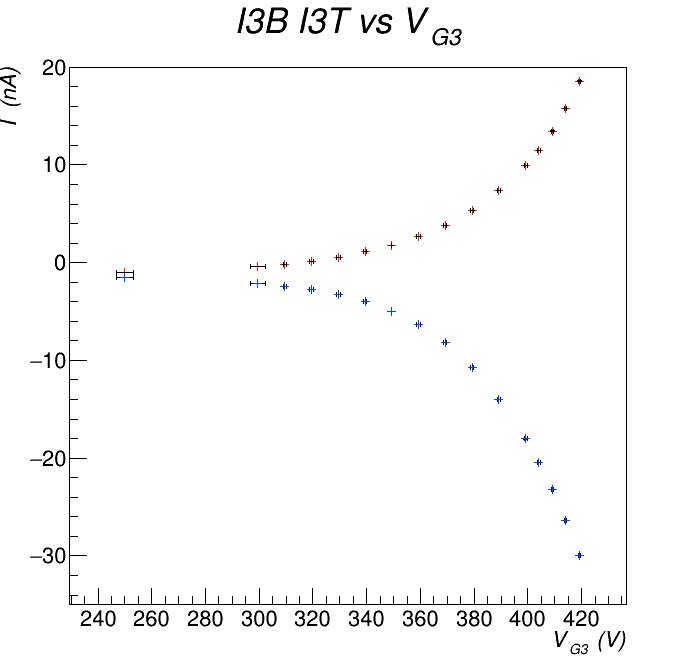

In [26]:
%jsroot off
c= ROOT.TCanvas("","",700,700)

Graph1 = ROOT.TGraphErrors(len(Par_3b), array.array("f", parV_gain), array.array("f", Par_3b), array.array("f", sigV_gain),
                          array.array("f",Par_err_3b))

Graph1.GetHistogram().SetMaximum(20)
Graph1.GetHistogram().SetMinimum(-35)
Graph1.Draw("AP")
Graph1.GetXaxis().SetTitle("#it{V_{G3} (V)}")
Graph1.GetYaxis().SetTitle("#it{I  (nA)}")
Graph1.SetTitle("#it{I3B I3T vs V_{G3}}")
Graph1.SetMarkerStyle(2)
Graph1.SetMarkerColor(99)
Graph2 = ROOT.TGraphErrors(len(Par_3t), array.array("f", parV_gain), array.array("f", Par_3t), array.array("f", sigV_gain), 
                          array.array("f", Par_err_3t))
Graph2.Draw("SAMEP")
Graph2.SetMarkerStyle(2)
Graph2.SetMarkerColor(60)
c.Draw()
c.SaveAs("Canvas/correnti VG3.png")


 FCN=9.24581 FROM MIGRAD    STATUS=CONVERGED    1012 CALLS        1013 TOTAL
                     EDM=1.42491e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.75168e-04   2.85588e-05   3.15031e-10  -6.47251e+03
   2  p1           2.76813e-02   3.78492e-04   1.31994e-08  -3.87879e+02
   3  p2           1.58228e-03   8.95233e-04   1.43684e-08  -1.52602e+02
   4  p3          -1.54278e+00   2.28914e-01   4.95983e-06  -4.34373e-01
 FCN=29.3102 FROM MIGRAD    STATUS=CONVERGED    1370 CALLS        1371 TOTAL
                     EDM=1.36748e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.54805e-04   2.14994e-05   4.23848e-10  -1.88273e+03
   2  p1           2.90279e-02   

Info in <TCanvas::Print>: png file Canvas/correnti VG3 con fit.png has been created


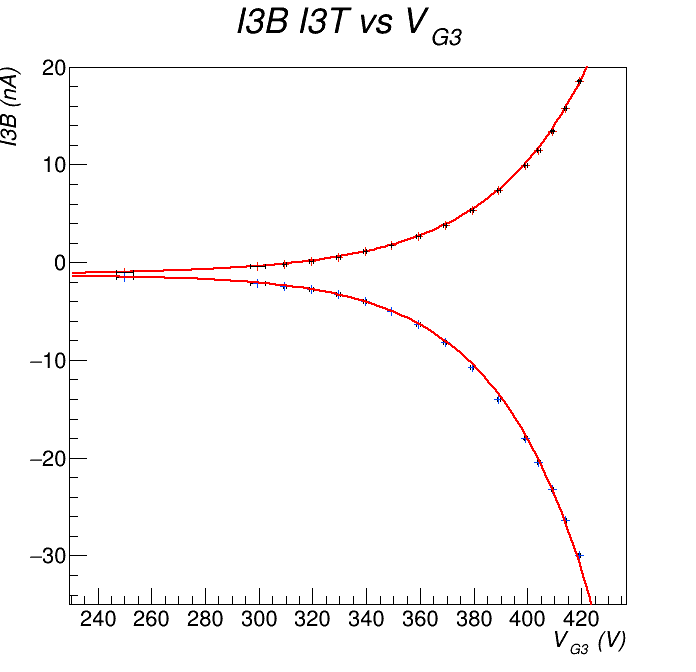

In [13]:
%jsroot off
f3 = ROOT.TF1("f3","[0]*e^([1]*x)+[2]*x+ [3]")
f3.SetParameters(0.0006,0.02, 0.02, -1)
#f2.SetParameters(0.0001,0.01,-1)
c= ROOT.TCanvas("","",700,700)

Graph1 = ROOT.TGraphErrors(len(Par_3b), array.array("f", parV_gain), array.array("f", Par_3b), array.array("f", sigV_gain),
                          array.array("f",Par_err_3b))
Graph1.Fit(f3,"S")
Graph1.GetHistogram().SetMaximum(20)
Graph1.GetHistogram().SetMinimum(-35)
Graph1.Draw("AP")
Graph1.GetXaxis().SetTitle("#it{V_{G3} (V)}")
Graph1.GetYaxis().SetTitle("#it{I3B (nA)}")
Graph1.SetTitle("#it{I3B I3T vs V_{G3}}")
Graph1.SetMarkerStyle(2)
Graph1.SetMarkerColor(99)
Graph2 = ROOT.TGraphErrors(len(Par_3t), array.array("f", parV_gain), array.array("f", Par_3t), array.array("f", sigV_gain), 
                          array.array("f", Par_err_3t))
f3.SetParameters(-0.01,-0.001,-0.01,-0.002)
Graph2.Fit(f3,"S")
Graph2.Draw("SAMEP")
Graph2.SetMarkerStyle(2)
Graph2.SetMarkerColor(60)
c.Draw()
c.SaveAs("Canvas/correnti VG3 con fit.png") 


****************************************
         Invalid FitResult  (status = 4 )
****************************************
Minimizer is Minuit / Migrad
Chi2                      =     0.110007
NDf                       =           12
Edm                       =  0.000191256
NCalls                    =         1486
p0                        =  6.66945e-05   +/-   1.07861e-05 
p1                        =    0.0299111   +/-   0.0003645   
p2                        =   0.00619082   +/-   0.00141592  
p3                        =     -2.69712   +/-   0.415489    


Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: png file Canvas/Guadagno fit exp + lineare.png has been created


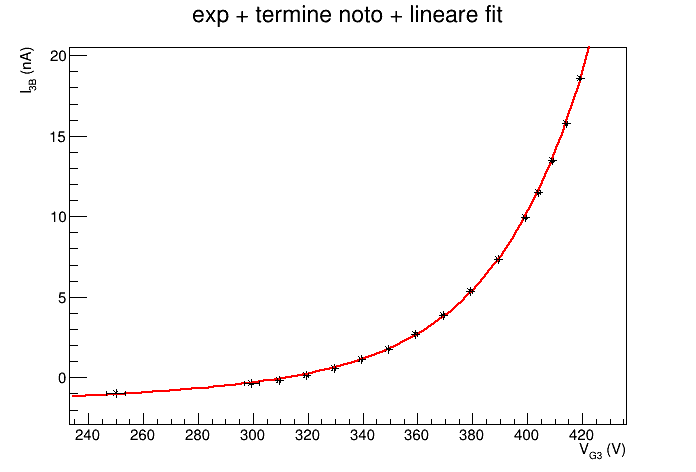

In [14]:
f3 = ROOT.TF1("f3","[0]*e^([1]*x)+[2]*x+ [3]")
c= ROOT.TCanvas()
graph = ROOT.TGraph(len(Par_3b), array.array("f",parV_gain), array.array("f",Par_3b))
f3.SetParameters(0.006,0.01, -0.03, -3)
c.Draw()
graph.Draw("AP")
graph1 = ROOT.TGraphErrors(len(Par_3b), array.array("f",parV_gain), 
                                  array.array("f",Par_3b), array.array("f",sigV_gain), array.array("f", Par_err_3b))
graph1.Draw("SAMEP")
graph.Fit(f3, "S")
p0 = f3.GetParameter(3)
graph.SetMarkerStyle(3)
graph.GetXaxis().SetTitle("V_{G3} (V)")
graph.GetYaxis().SetTitle("I_{3B} (nA)")
graph.SetTitle("exp + termine noto + lineare fit")
c.SaveAs("Canvas/Guadagno fit exp + lineare.png")

[-0.96338124 -0.38221065 -0.13943095  0.16051982  0.57063634  1.11020826
  1.78763753  2.70806191  3.8505183   5.37506743  7.36192808  9.92993924
 11.49617537 13.47215491 15.79810836 18.57495345]
-2.6971167167850063
[ 1.73373548  2.31490607  2.55768577  2.85763654  3.26775305  3.80732497
  4.48475425  5.40517862  6.54763502  8.07218415 10.0590448  12.62705596
 14.19329209 16.16927163 18.49522507 21.27207017]

****************************************
Minimizer is Minuit / Migrad
Chi2                      =     0.109795
NDf                       =           12
Edm                       =  1.59913e-07
NCalls                    =          188
p0                        =  6.40549e-05   +/-   2.31405e-05 
p1                        =    0.0300035   +/-   0.000825416 
p2                        =    0.0064533   +/-   0.00239159  
p3                        =    -0.070169   +/-   0.659956    


Info in <TCanvas::Print>: png file Canvas/Guadagno fit exp + lineare.png has been created


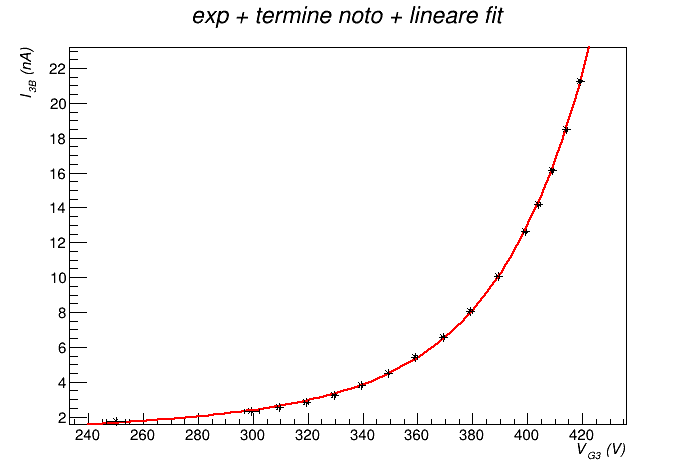

In [15]:
R = []
print(Par_3b)

print(p0)
Par_3b_corr = Par_3b -p0
print(Par_3b_corr)

c= ROOT.TCanvas()
graph = ROOT.TGraph(len(Par_3b_corr), array.array("f",parV_gain), array.array("f",Par_3b_corr))
graph.Fit(f3, "S")
f3.SetParameters(0.0001,0.02, -0.05, -1)
c.Draw()
graph.Draw("AP")
graph_1 = ROOT.TGraphErrors(len(Par_3b_corr), array.array("f", parV_gain), array.array("f", Par_3b_corr),
                      array.array("f", sigV_gain), array.array("f", Par_err_3b))
graph_1.Draw("SAMEP")
p1 = f3.GetParameter(3)
graph.SetMarkerStyle(3)
graph.GetXaxis().SetTitle("#it{V_{G3} (V)}")
graph.GetYaxis().SetTitle("#it{I_{3B} (nA)}")
graph.SetTitle("#it{exp + termine noto + lineare fit}")
c.SaveAs("Canvas/Guadagno fit exp + lineare.png")



****************************************
Minimizer is Minuit / Migrad
Chi2                      =    0.0150943
NDf                       =           12
Edm                       =  1.95962e-06
NCalls                    =          390
p0                        =  2.39131e-05   +/-   7.46153e-06 
p1                        =    0.0299876   +/-   0.00071302  
p2                        =   0.00237818   +/-   0.000787531 
p3                        =   -0.0221739   +/-   0.219376    


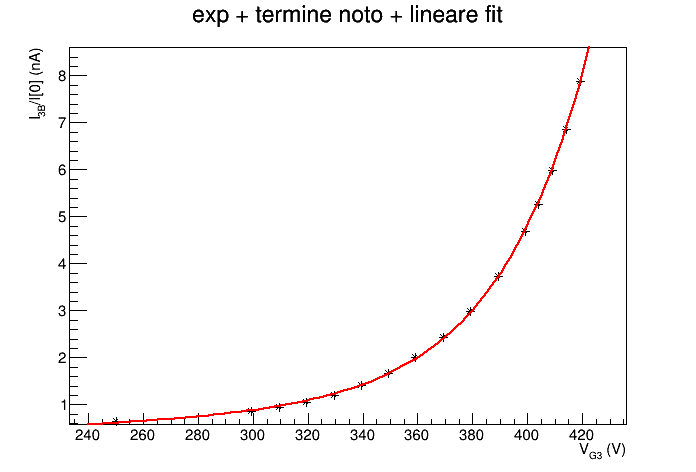

In [16]:
R = []
for i in range(len(Par_3b)):
    R.append(-(Par_3b_corr[i])/p0)
c= ROOT.TCanvas()
graph = ROOT.TGraph(len(R), array.array("f",parV_gain), array.array("f",R))
f3.SetParameters(0.0001,0.02, -0.05, -1)
c.Draw()
graph.Draw("AP")
graph.Fit(f3, "S")
#p1 = f3.GetParameter(3)
graph.SetMarkerStyle(3)
graph.GetXaxis().SetTitle("V_{G3} (V)")
graph.GetYaxis().SetTitle("I_{3B}/I[0] (nA)")
graph.SetTitle("exp + termine noto + lineare fit")
#c.SaveAs("Canvas/Guadagno fit exp + lineare.png")


In [17]:
folder = "arrays/kpa_data"
Kname_gain = []
for i in range(339,355):
    Kname_gain.append("KPA_K_run0" + str(i)+ ".csv")

In [18]:
parIx_gain,parIy_gain,sigIx_gain,sigIy_gain = Functions.K_mean(folder, Kname_gain)
parIx_gain = np.array(parIx_gain) * (10**(9))
parIy_gain = np.array(parIy_gain) * (10**(9))

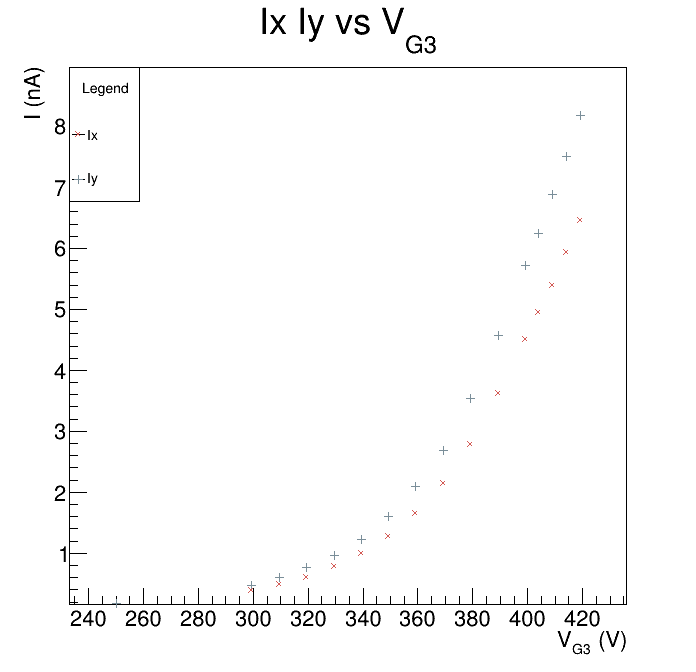

In [19]:
c = ROOT.TCanvas("", "", 700, 700)
Graph2 = ROOT.TGraph(len(parIy_gain), array.array("f", parV_gain), array.array("f", parIy_gain))
Graph2.SetTitle("Ix Iy vs V_{G3}")
Graph2.Draw("AP")
Graph2.SetMarkerStyle(2)
Graph2.SetMarkerColor(34)
Graph1 = ROOT.TGraph(len(parIx_gain), array.array("f", parV_gain), array.array("f", parIx_gain))
Graph1.Draw("SAMEP")
Graph2.GetXaxis().SetTitle("V_{G3} (V)")
Graph1.SetMarkerStyle(5)
Graph1.SetMarkerColor(50)
Graph2.GetYaxis().SetTitle("I (nA)")

c.Draw()

Leg = ROOT.TLegend(0.1,0.7,0.2,0.9)
Leg.SetHeader("Legend","C")
Leg.AddEntry(Graph1, "Ix")
Leg.AddEntry(Graph2, "Iy")
Leg.Draw()
#print(parIx_gain)
#print(ParI_3b)

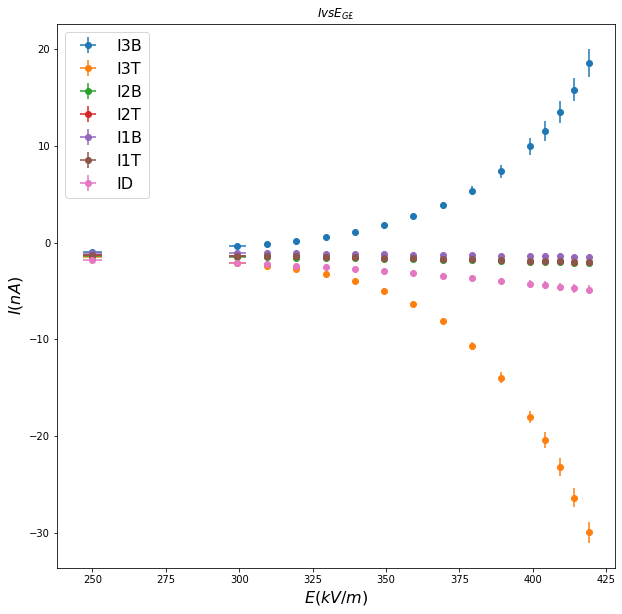

In [24]:
plt.figure(figsize = (10,10))

for i in range(len(ParI_gain)):
    #plt.scatter(parV_gain, ParI_gain[i], label = colonne[i])
    plt.errorbar(parV_gain, ParI_gain[i], yerr = SigI_gain[i], xerr = sigV_gain, marker = "o", linestyle = " ", label = colonne[i])
    
#plt.scatter(parV_tr2,parIx_tr2, label = "Ix")
#plt.scatter(parV_tr2,parIy_tr2, label = "Iy")
#plt.errorbar(parV_gain, parIx_gain, yerr = sigIx_gain, xerr = sigV_gain, marker = "o", linestyle = " ", label = "Ix")
#plt.errorbar(parV_gain,parIy_gain, yerr = sigIy_gain, xerr = sigV_gain, marker = "o", linestyle = " ", label = "Iy")
#plt.plot( [240,430], [0,0], "-", color = "red")
#plt.yscale("log")
plt.ylabel("$I (nA)$", size = 16)
plt.xlabel("$E (kV/m)$", size = 16)
plt.title("$ I vs E_{G£}$")

plt.legend(fontsize = 16)
plt.show()

In [87]:
i3b = np.array(ParI_gain[0])
i3t = np.array(ParI_gain[1])
i2b = np.array(ParI_gain[2])
i2t = np.array(ParI_gain[3])
i1b = np.array(ParI_gain[4])
i1t = np.array(ParI_gain[5])
ix = np.array(parIx_gain)
iy = np.array(parIy_gain)
id = np.array(ParI_gain[6])
VG3 = np.array(parV_gain)
VG2 = np.array(parVG2_gain)
VG1 = np.array(parVG1_gain)

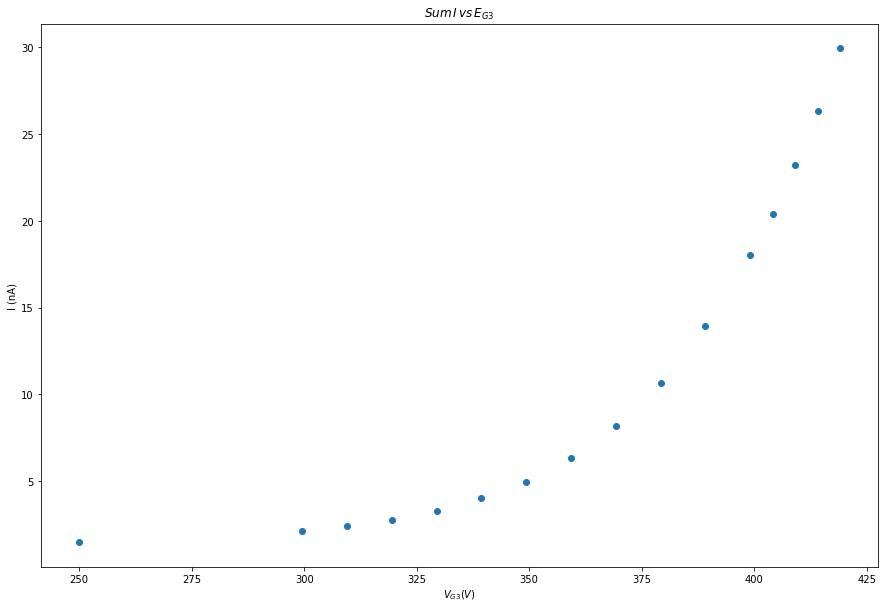

In [88]:
I = []
for i in range(len(parV_gain)):
    I.append(-i3t[i])
    
plt.figure(figsize = (15,10))
plt.scatter(parV_gain,I)
#plt.plot([250,380], [20,20])
#plt.errorbar(Vtot,Sum, yerr = Sig, marker ="o", linestyle = " ")
plt.title("$Sum \, I \, vs \, E_{G3}$")
plt.ylabel("I (nA)")
plt.xlabel("$V_{G3} (V )$")
plt.show()

[0.38160123237931254, 0.38828610088060017, 0.3997304157115945, 0.3793814050783574, 0.4145415109911397, 0.42037461922327174, 0.448394122840944, 0.4917360675259728, 0.5518048961799294, 0.6813766124503734, 0.9276694312964776, 1.1296687078117345, 1.341077527638525, 1.5325899525794795, 1.613712583473176, 1.8513315048857857]


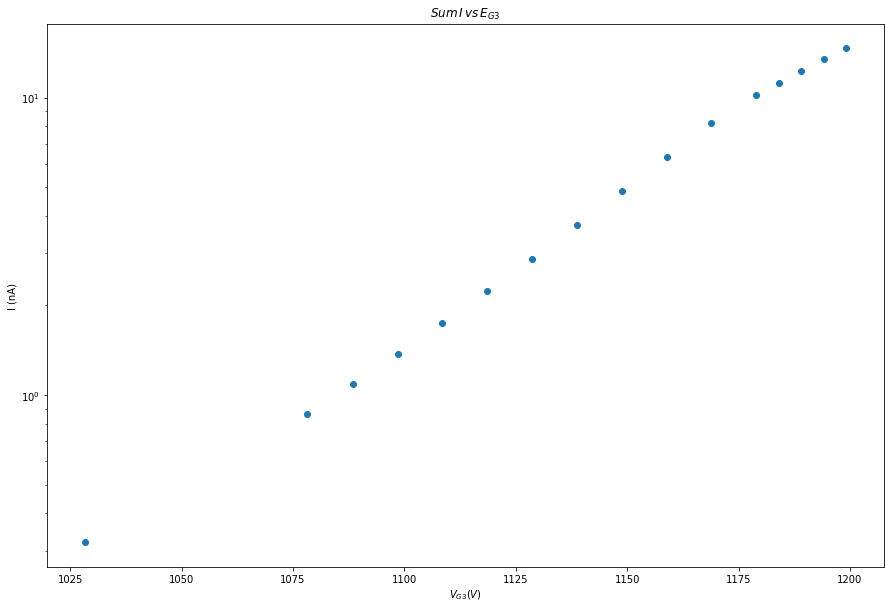

In [89]:
Sum = []
sum = 0
for i in range(len(parV_gain)):
    #sum = i3b[i] + i3t[i]  
    sum = (ix[i] + iy[i])
    #sum += id[i]
    Sum.append(sum)

Vtot = VG3+VG2+VG1
Sig = []
for i in range(len(parV_gain)):
    sig = SigI_gain[0][i]**2 + SigI_gain[1][i]**2 + SigI_gain[2][i]**2 + SigI_gain[3][i]**2 + SigI_gain[4][i]**2
    + SigI_gain[5][i]**2 + SigI_gain[6][i]**2
    sig+= sigIy_gain[i]**2 + sigIx_gain[i]**2
    Sig.append(sqrt(sig))

print(Sig)
plt.figure(figsize = (15,10))
plt.yscale("log")
plt.scatter(Vtot,Sum)
#plt.errorbar(Vtot,Sum, yerr = Sig, marker ="o", linestyle = " ")
plt.title("$Sum \, I \, vs \, E_{G3}$")
plt.ylabel("I (nA)")
plt.xlabel("$V_{G3} (V )$")
plt.show()

Guadagno reale: quanti elettroni ha creato la GEM
    Guadagno effettivo: l'output che misuri
La curva del guadagno reale è quella della somma delle correnti all'anodo
Il regime proporzionale è solo un regime di basso guadagno, il nostro regime esponenziale
Noi costruire dei rivelatori perfetti perchè non si devono rompere. Faccio 3 step per farle lavorare sotto i 400 V per renderla
più robusta. Questo è quello che riguarda il rivelatore di LHC. L'efficienza alta abbassando la probabilità di scarica distruttiva
Lo fai lavorare al di sotto del working point ideale per aumetntare la probabilità che resista. 


****************************************
         Invalid FitResult  (status = 4 )
****************************************
Minimizer is Minuit / Migrad
Chi2                      =     0.016464
NDf                       =           12
Edm                       =  0.000107977
NCalls                    =         1486
p0                        =  3.26892e-05   +/-   2.85924e-06 
p1                        =    0.0292722   +/-   0.000194712 
p2                        =   0.00165556   +/-   0.000443994 
p3                        =     0.170497   +/-   0.136589    


Warning in <Fit>: Abnormal termination of minimization.


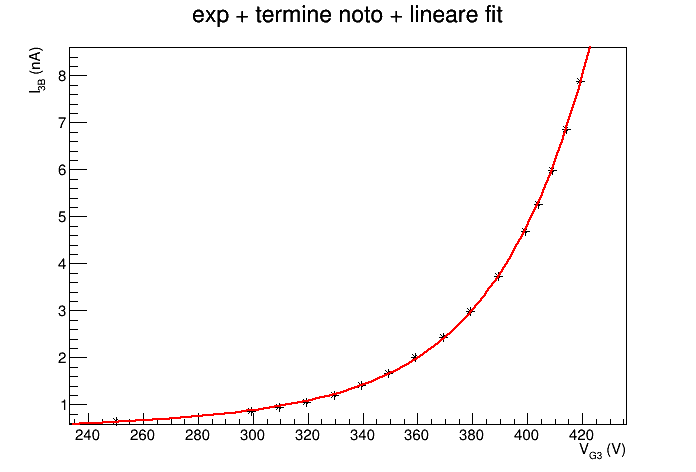

In [90]:
c= ROOT.TCanvas()
graph = ROOT.TGraph(len(R), array.array("f",parV_gain), array.array("f",R))
f3.SetParameters(0.006,0.01, -0.03, -3)
c.Draw()
graph.Draw("AP")
graph.Fit(f3, "S")
graph.SetMarkerStyle(3)
graph.GetXaxis().SetTitle("V_{G3} (V)")
graph.GetYaxis().SetTitle("I_{3B} (nA)")
graph.SetTitle("exp + termine noto + lineare fit")
#c.SaveAs("Canvas/Guadagno fit exp + lineare.png")

G = e_out / e_in
Sorgente ferro .> gamma 5.9 keV  -> effetto fotoelettrico -> rilascia tutta la sua energia se interagisce -> X coppie elettrone ione -> se ho numero di coppie ho e int
Flusso -> attivita sorgente * sezione dìurto
Si raggiunge un valore di plateau  -> vuol dire che stai contando quasi tutti gli elettroni -> Ogni hz mi fa tot coppie per tot kHz -> carica ingresso
carica uscita/carica ingresso
